In [1]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import nibabel as nib
import random
from scipy import stats
from scipy import fft
import random
import pywt.data
from PIL import Image
import pandas as pd
import seaborn as sns
import os
import pickle

In [2]:
np. __version__

'1.26.3'

In [3]:
# assign directory
import os
BRANDON = '/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/'
YASH = '/Users/yashd/Desktop/hierarchical-bayesian-model-validation/'

ROOT_DIR = BRANDON
data_dir = ROOT_DIR + 'raw-data/100_syntheticMRI-3d'
# iterate over files in that directory
file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir)]
file_names = os.listdir(data_dir)
n = len(file_list)

In [4]:
os.chdir(ROOT_DIR + "testing-framework/")
from utilities import *
from plot_utilities import *
os.chdir(ROOT_DIR + "dataset-preparation/")
from transform_utilities import *
from scipy import ndimage


In [6]:
first_image = nib.load(file_list[0]).get_fdata()

In [7]:
mri_coord_df = getIndexDF_3d(first_image).sort_values(["magnitude"])


In [8]:
full_decomp = fourier_full_decomp_3d(data_dir, coord_df= mri_coord_df, debug = True)
full_decomp

100%|██████████| 100/100 [00:31<00:00,  3.14it/s]


,x_index,y_index,z_index,x_freq,y_freq,z_freq,magnitude,Data
index_coords,,,,,,,,
"(0, 0, 0)",0,0,0,0.00000,0.000000,0.00000,0.000000,"[(49257324416-0j), (49257324416-0j), (49257324..."
"(0, 1, 0)",0,1,0,0.00000,0.004464,0.00000,0.004464,"[(-18493530034.481766-3943535717.4455204j), (-..."
"(0, 0, 1)",0,0,1,0.00000,0.000000,0.00625,0.006250,"[(-10388715531.239899-9243585541.701508j), (-1..."
"(1, 0, 0)",1,0,0,0.00625,0.000000,0.00000,0.006250,"[(-13007545690.156769+810555099.807267j), (-13..."
"(1, 1, 0)",1,1,0,0.00625,0.004464,0.00000,0.007681,"[(1550923540.2460556+1526898431.9516926j), (15..."
...,...,...,...,...,...,...,...,...
"(79, 109, 79)",79,109,79,0.49375,0.486607,0.49375,0.851096,"[(84721.60930823913-638242.1551739206j), (8472..."
"(79, 111, 78)",79,111,78,0.49375,0.495536,0.48750,0.852644,"[(665436.0558200049-1019369.2185137235j), (665..."
"(78, 111, 79)",78,111,79,0.48750,0.495536,0.49375,0.852644,"[(-1066256.2361298115+275371.2313878995j), (-1..."


In [9]:
coeffs, mags = convert_fourier_list_3d(data_dir, coord_df=mri_coord_df, debug = True)
real_data = np.real(coeffs)
imag_data = np.imag(coeffs)
n= len(real_data)

100%|██████████| 100/100 [00:31<00:00,  3.14it/s]


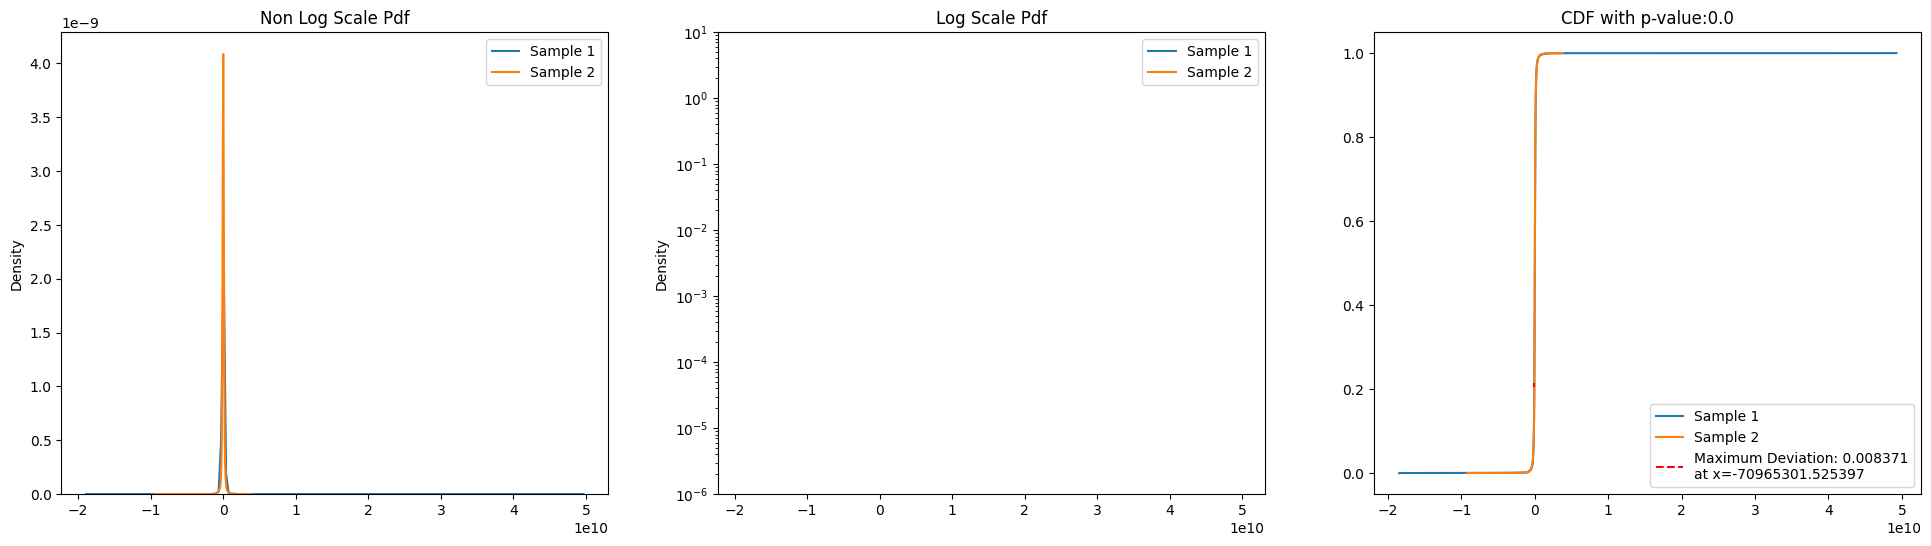

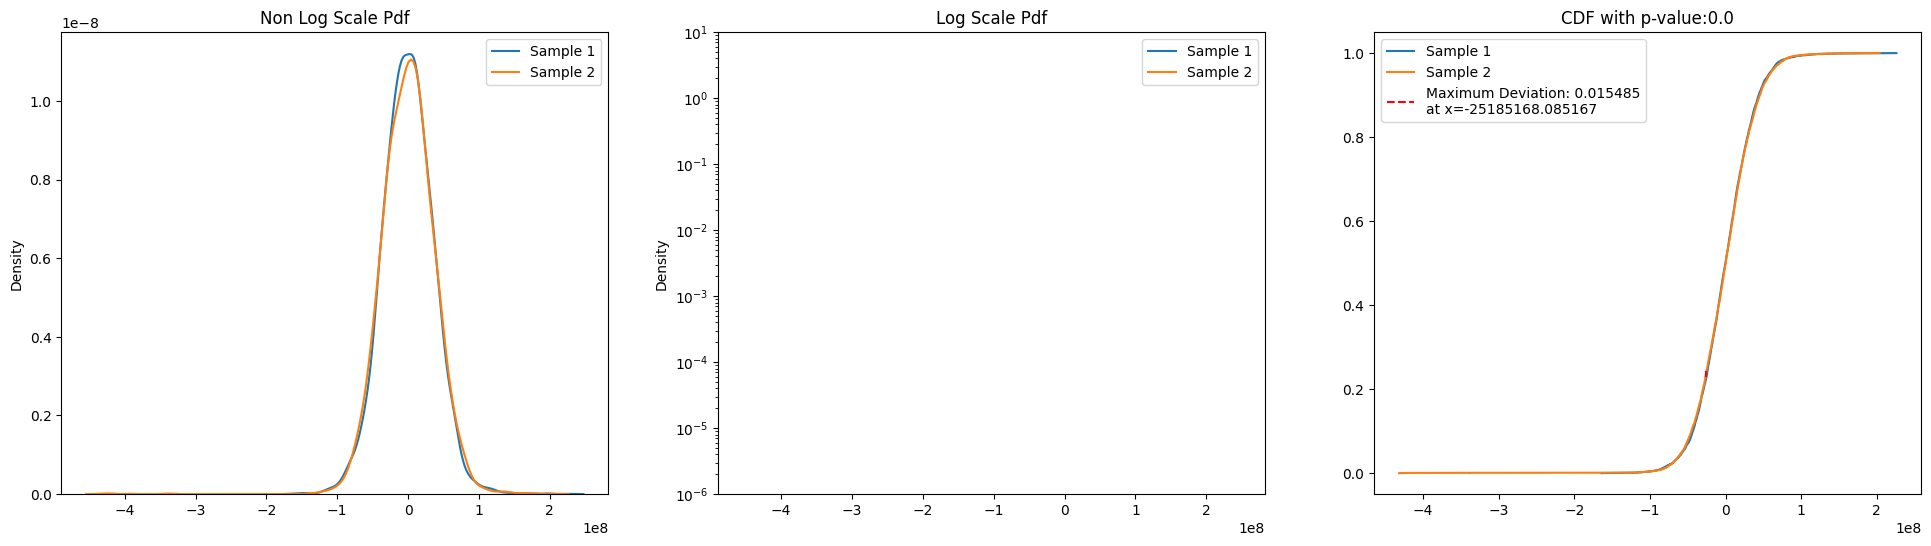

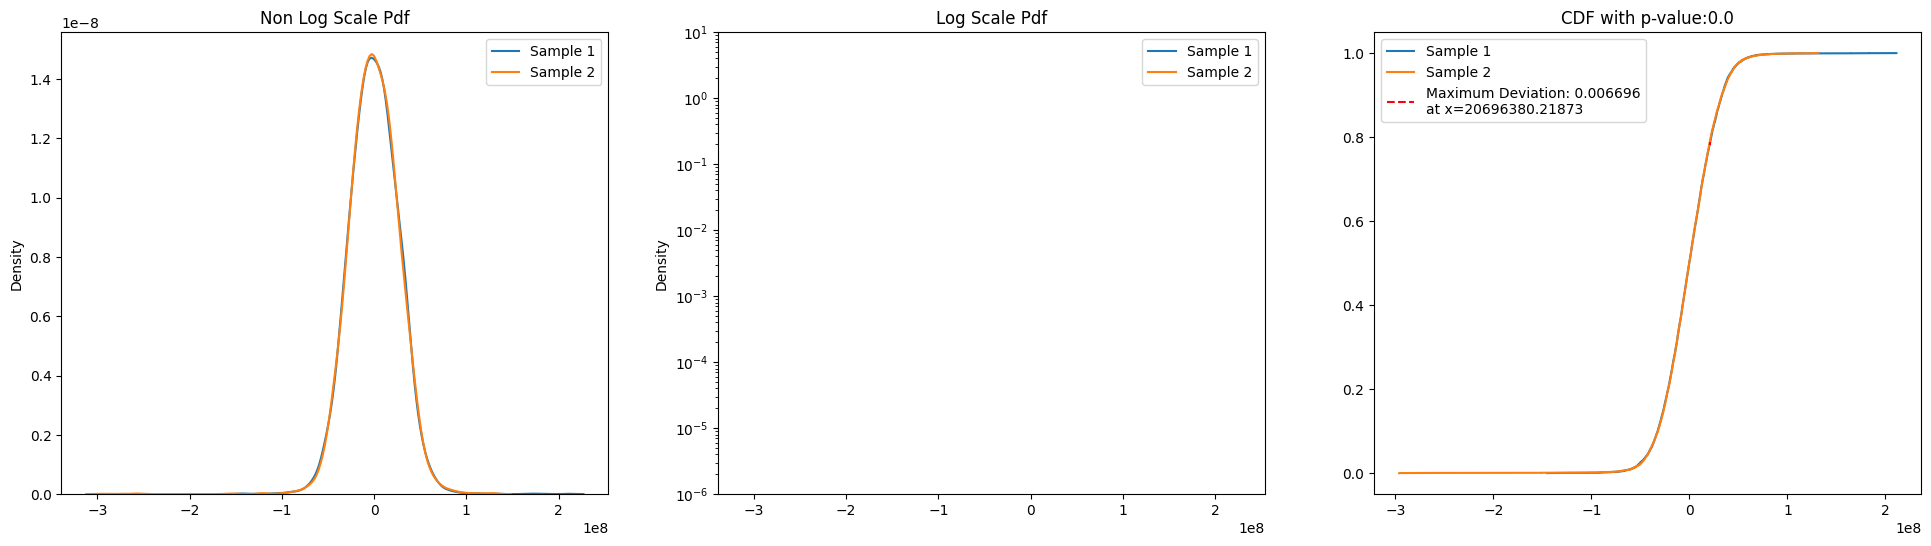

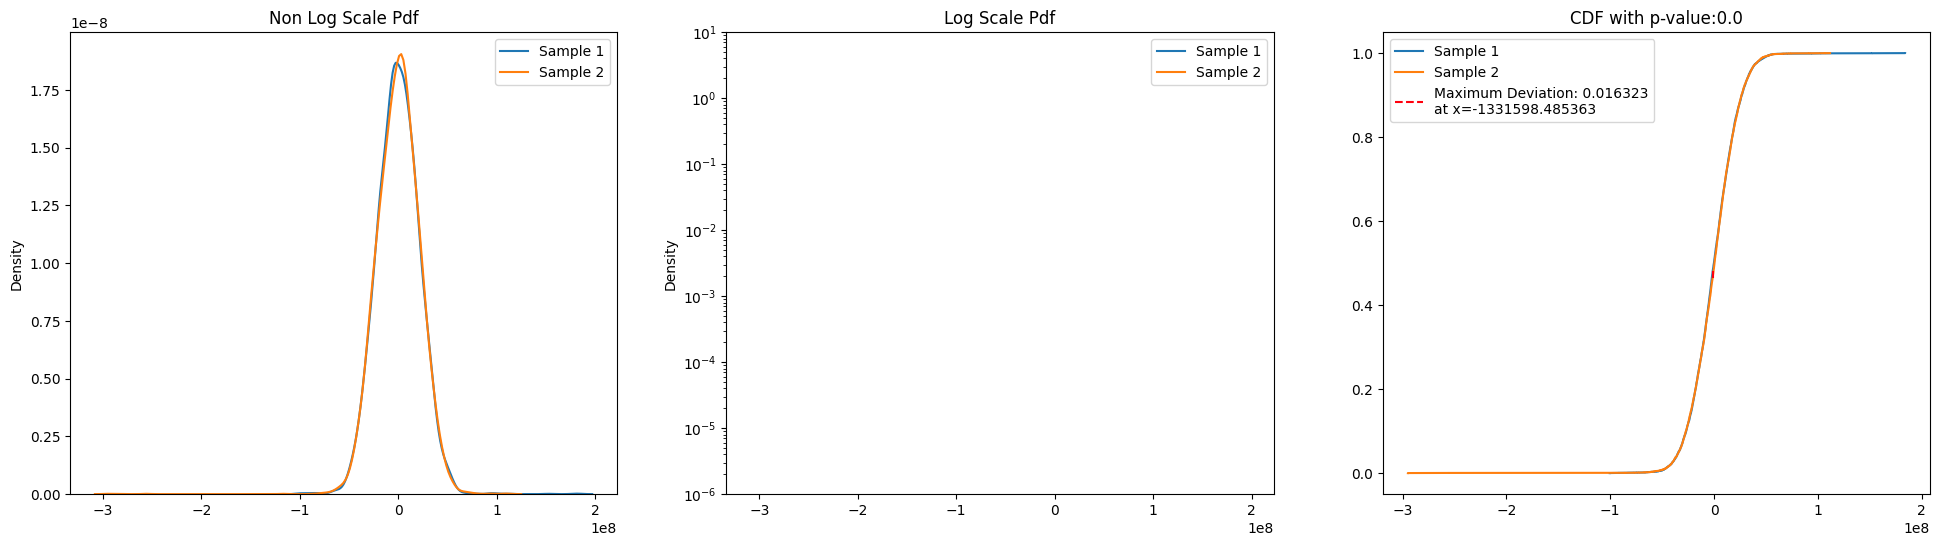

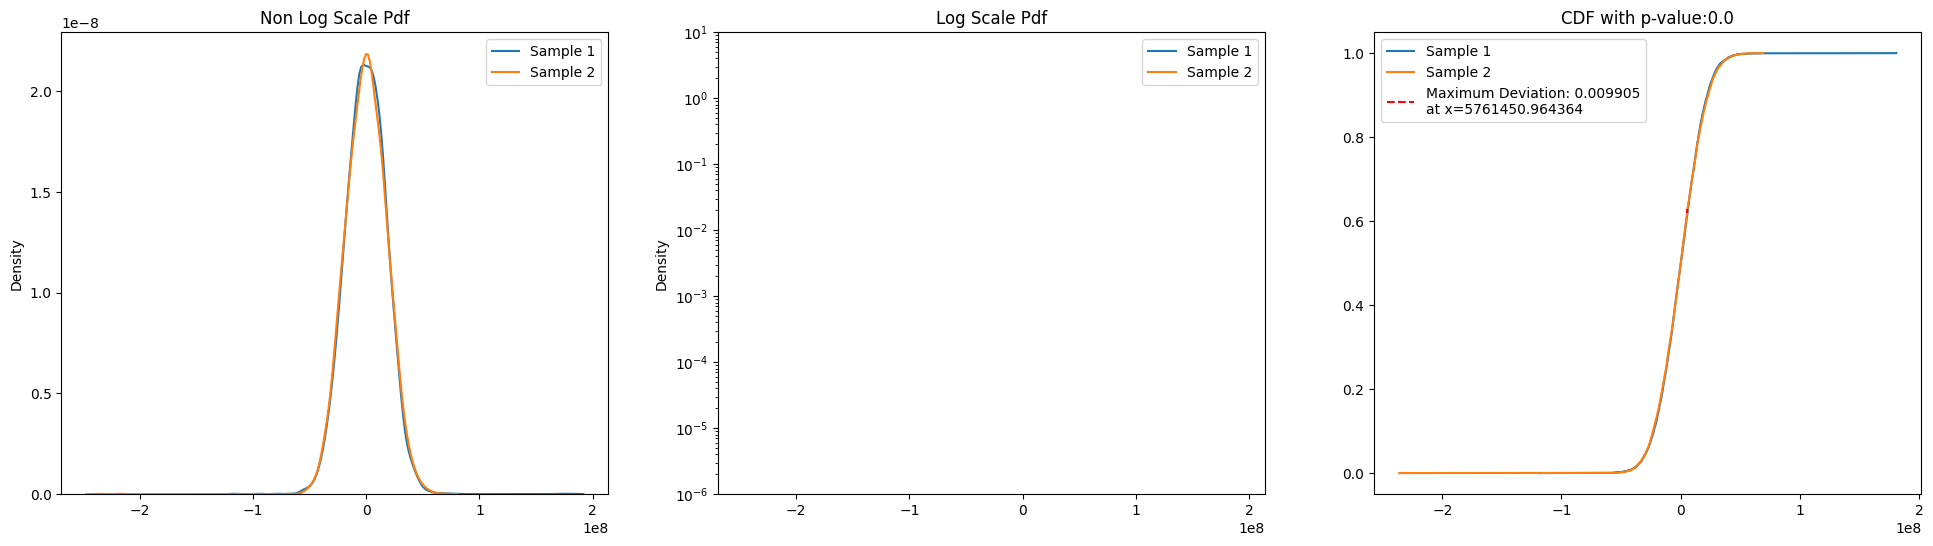

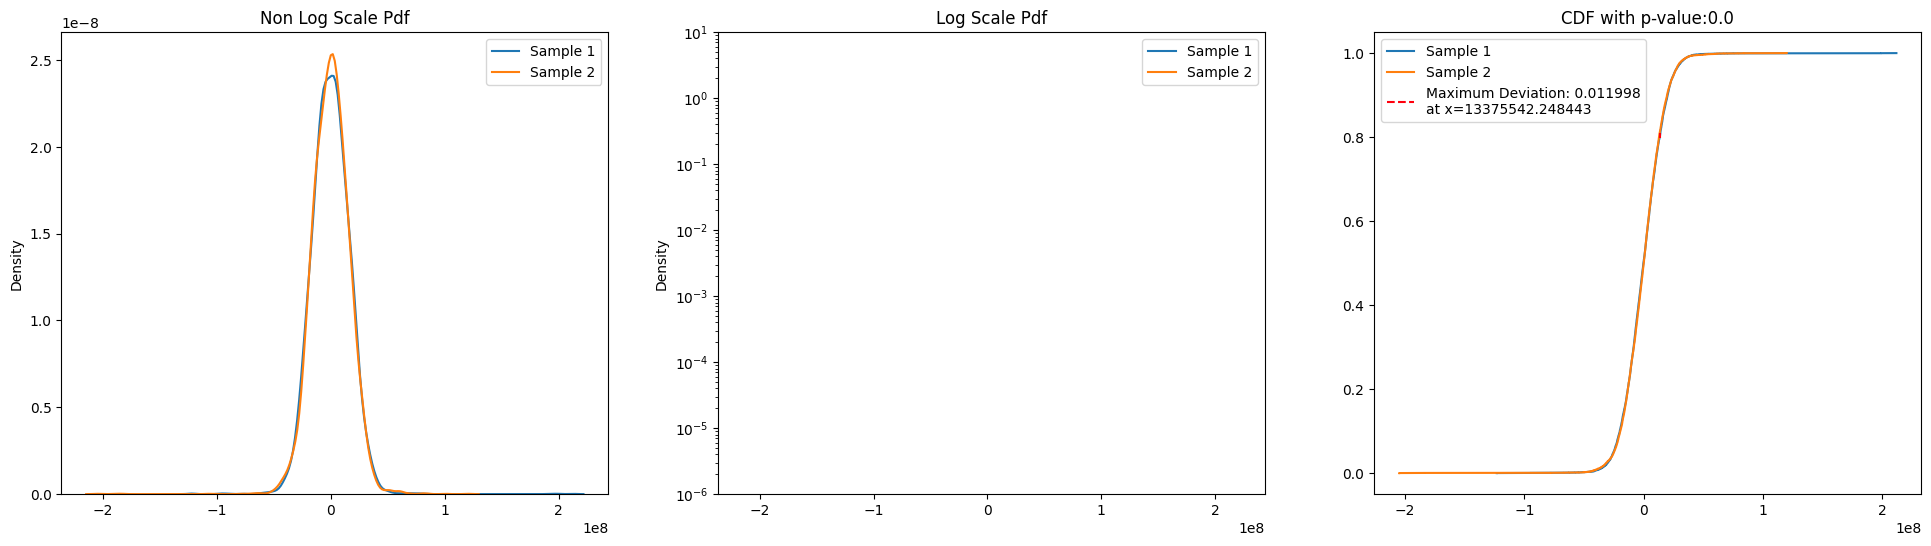

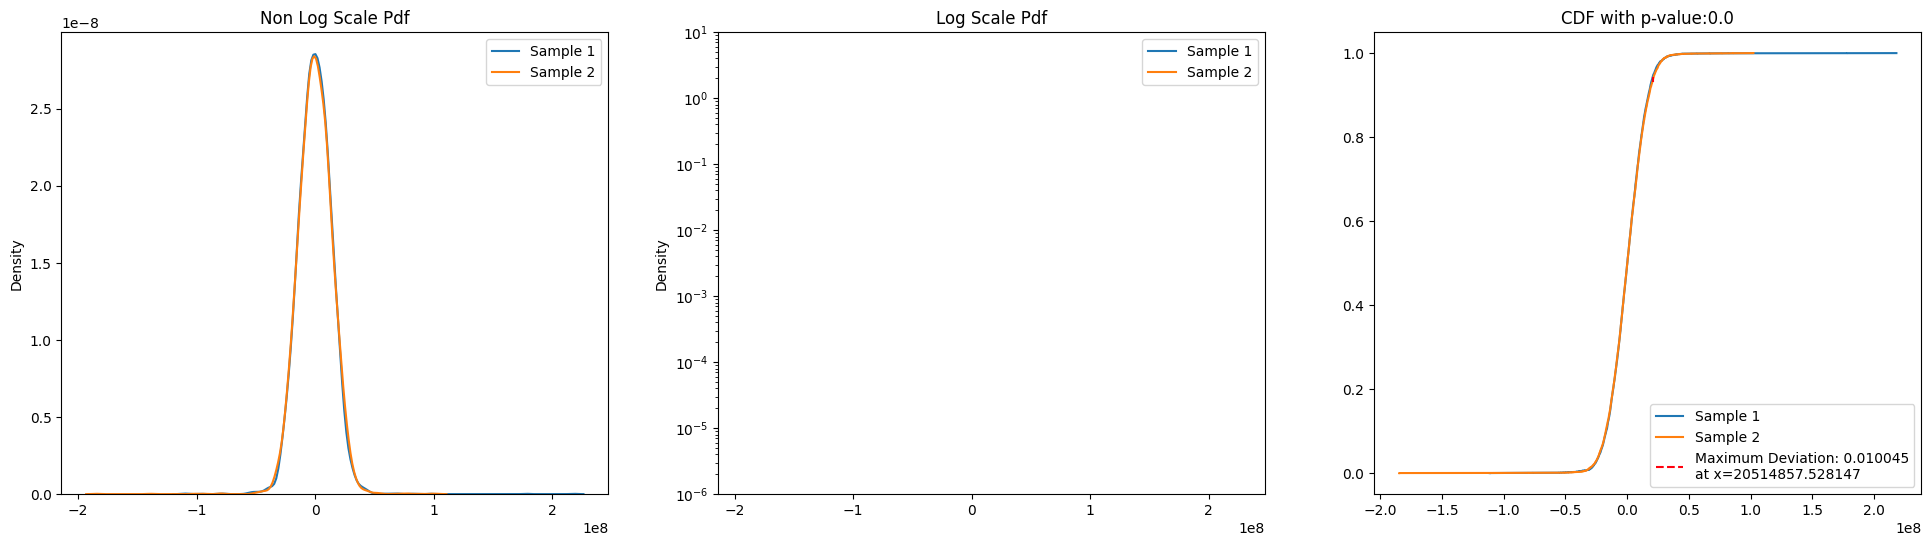

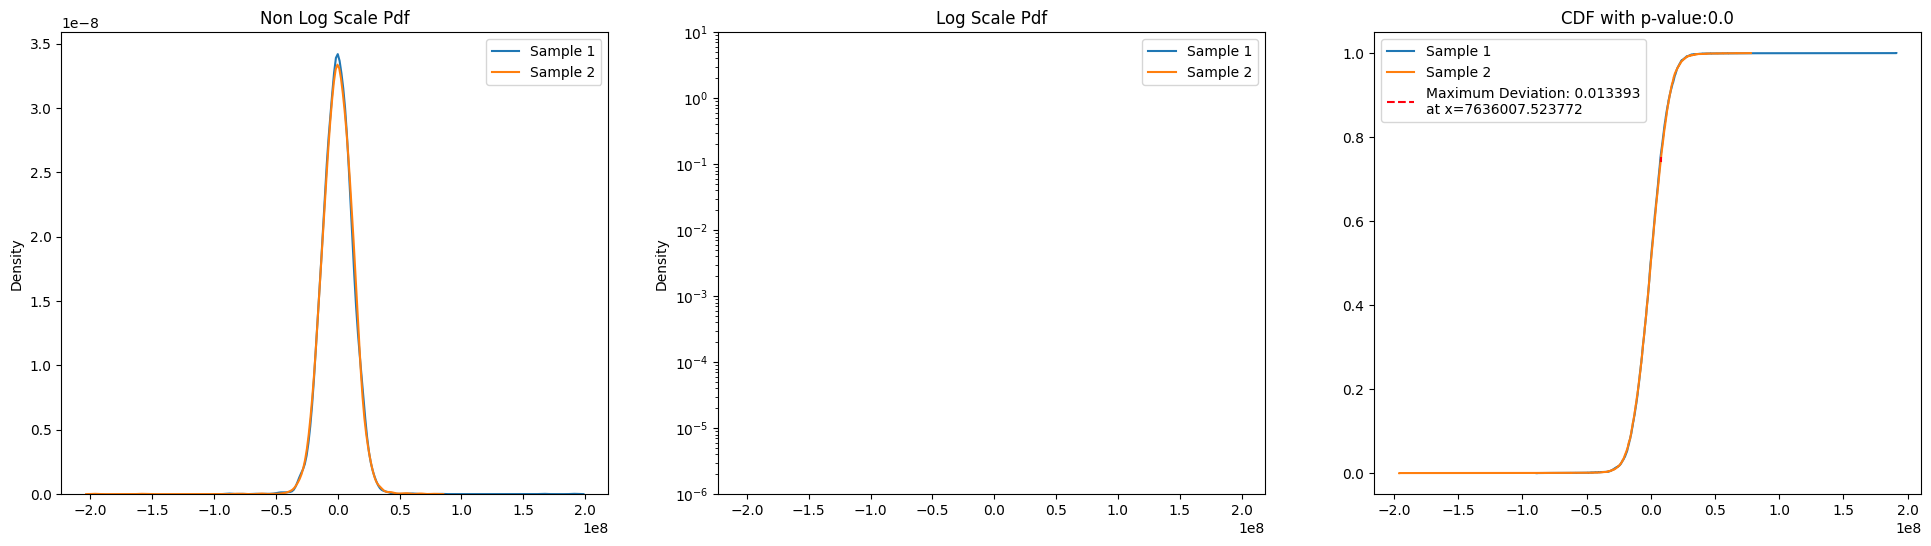

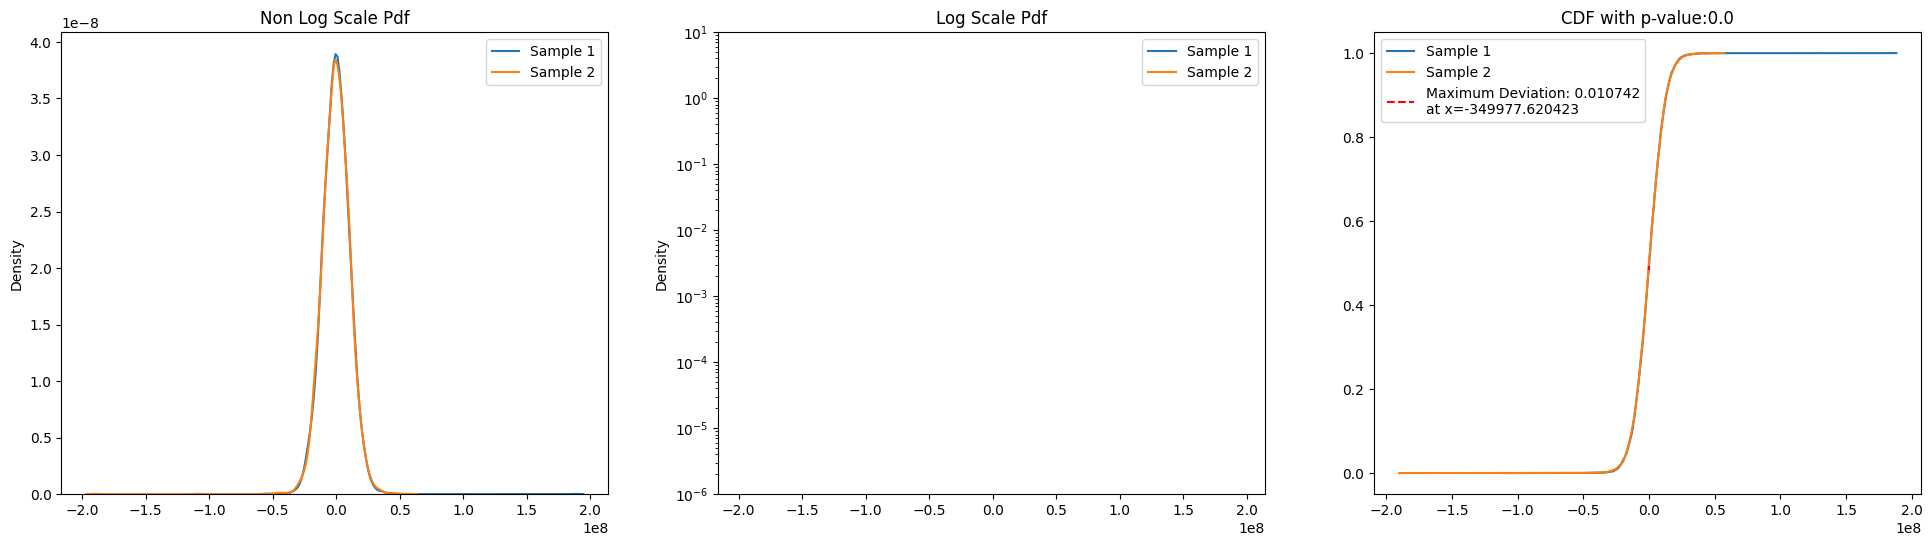

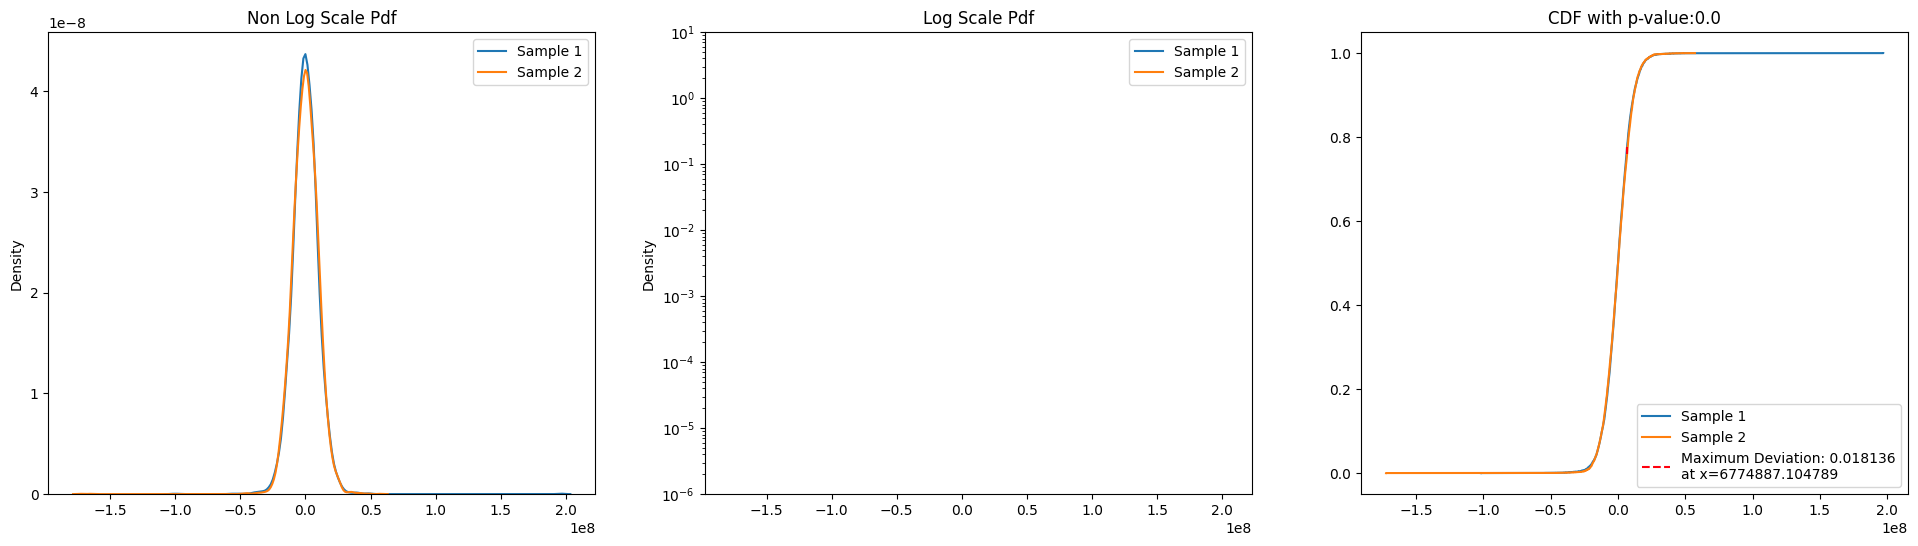

In [10]:

for i in range(10):
    twoSampleComparisonPlots(real_data[n//100 * i: n//100 * (i+1)], imag_data[n//100 * i: n//100 * (i+1)])


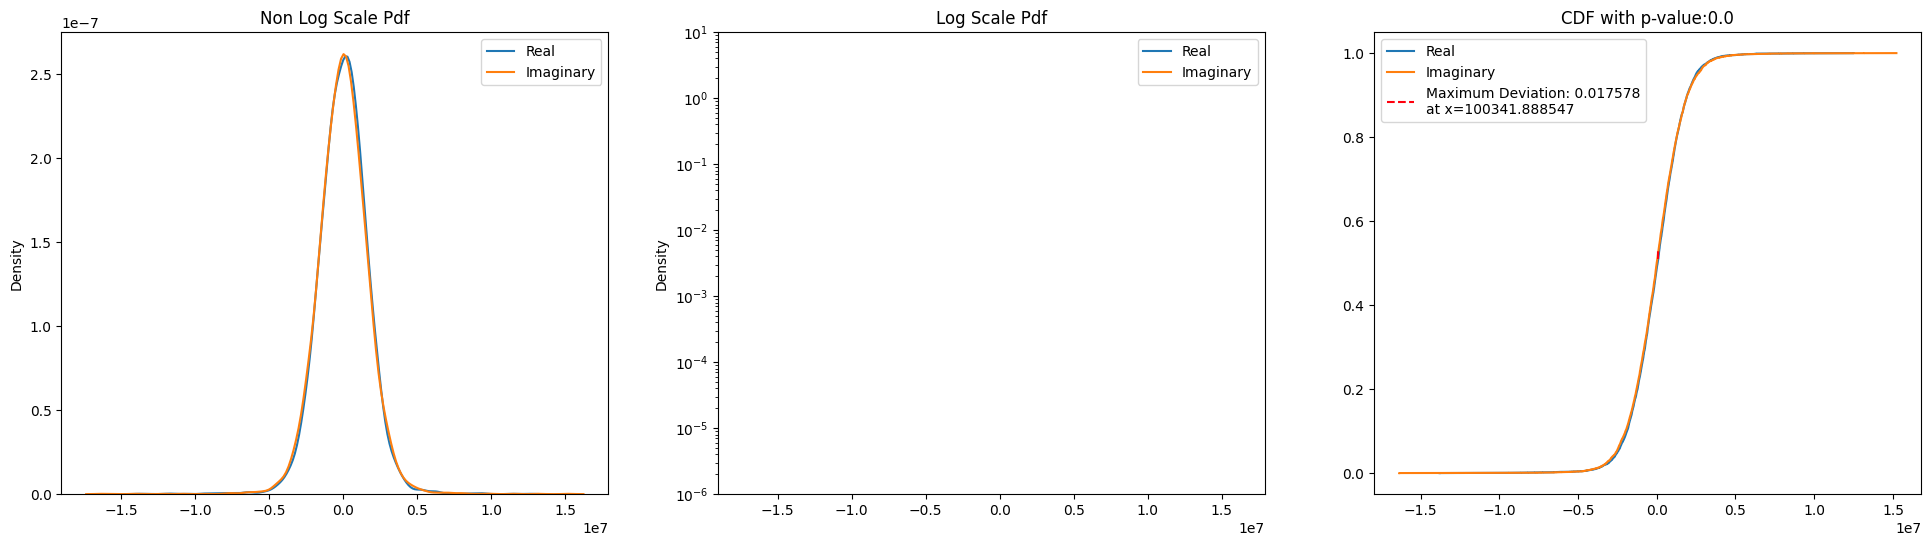

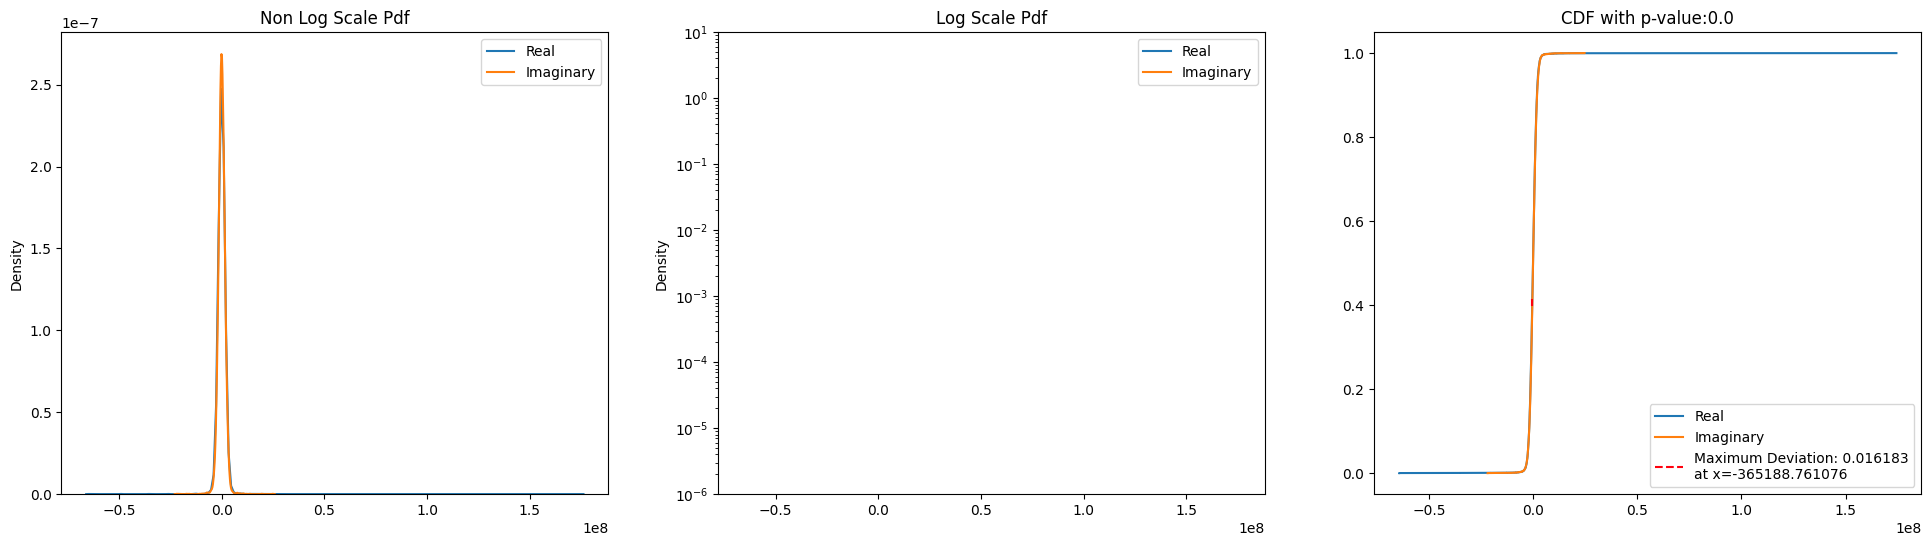

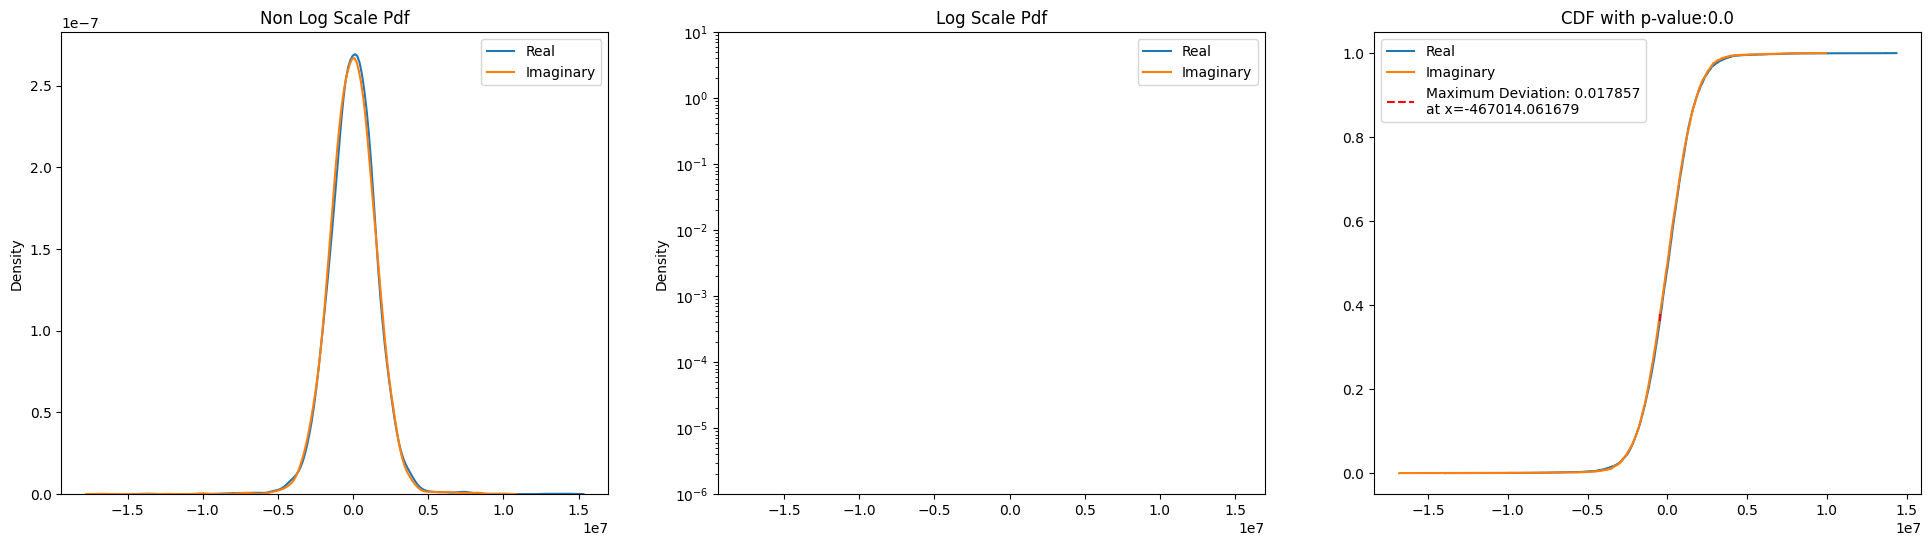

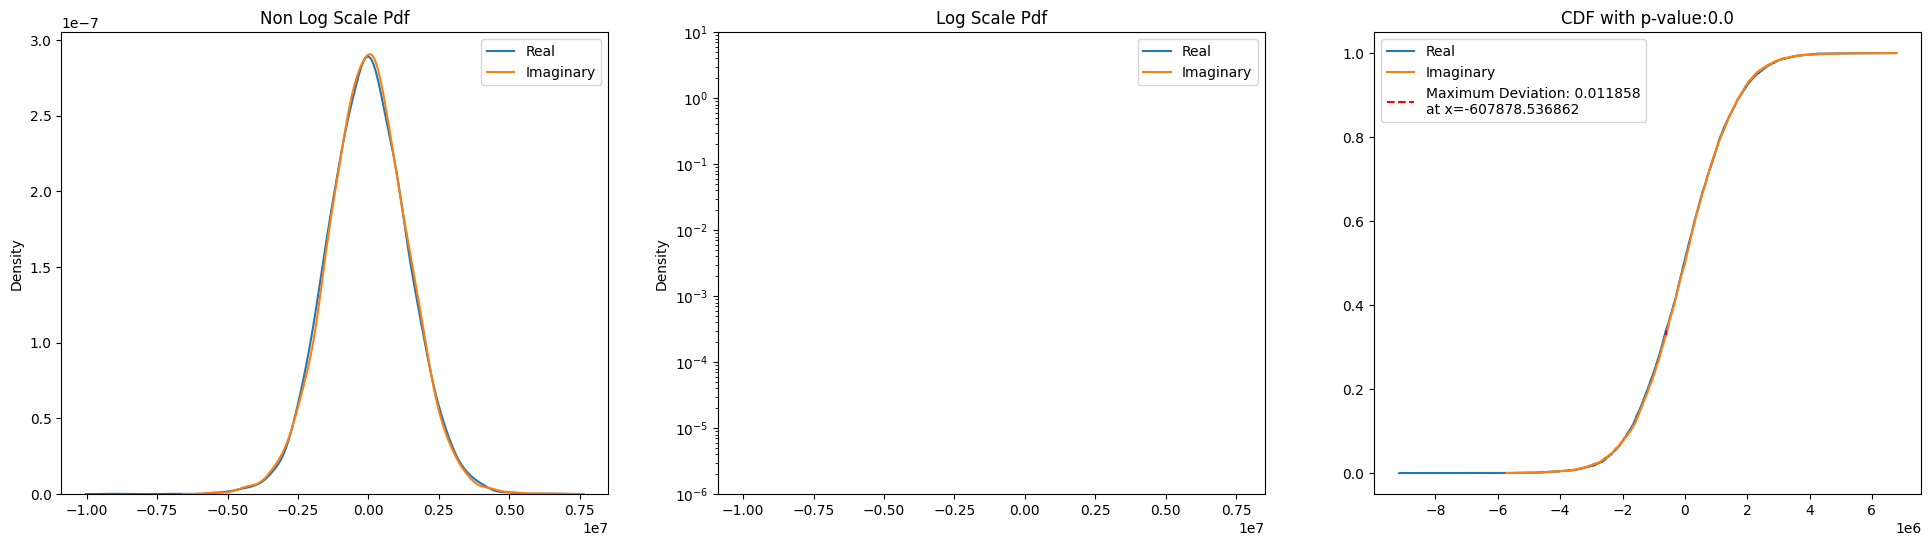

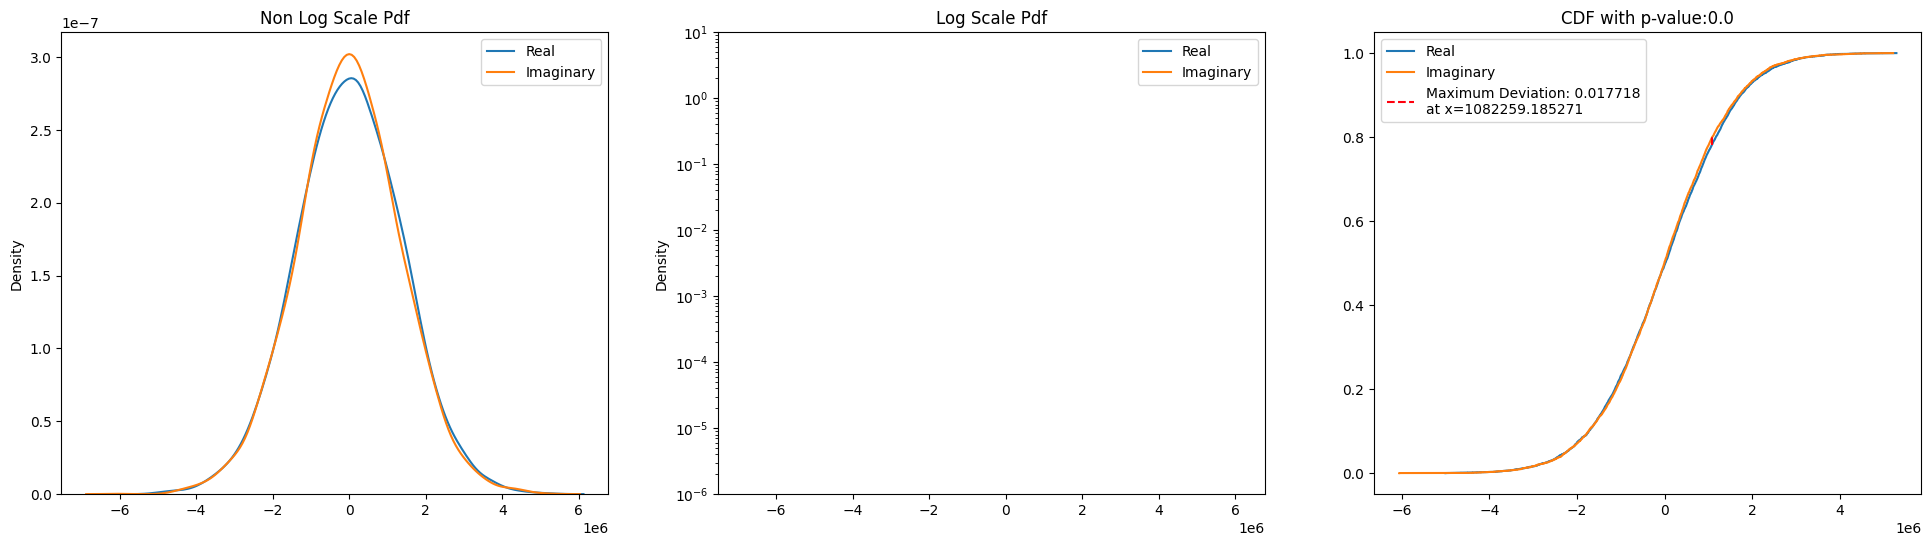

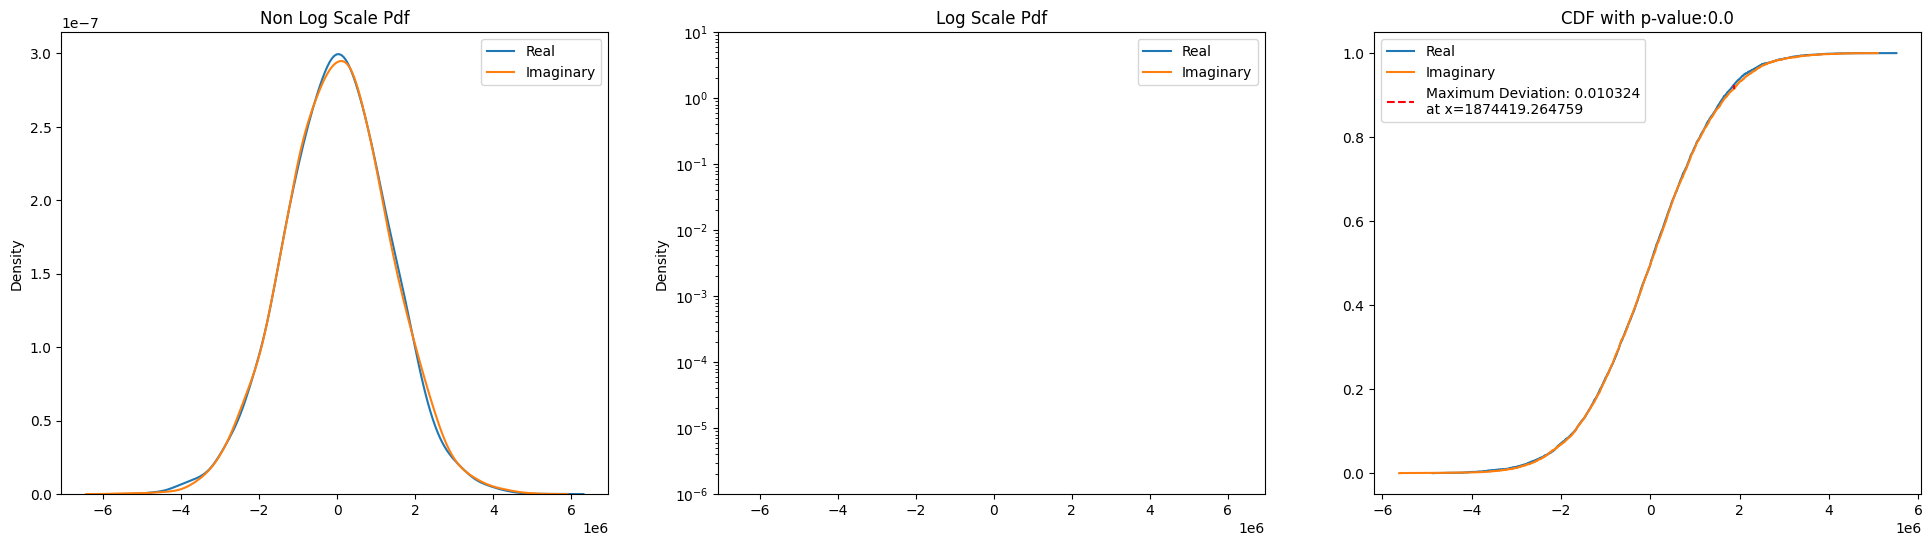

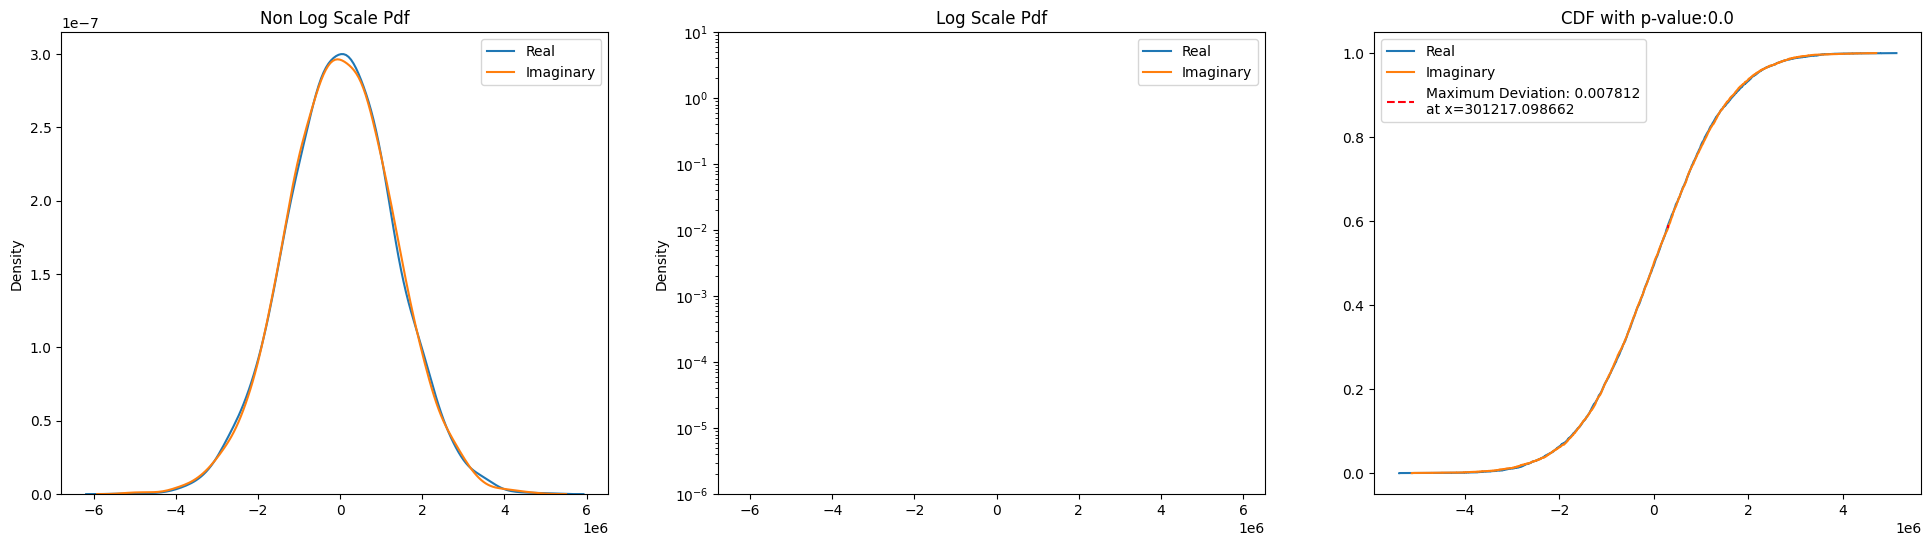

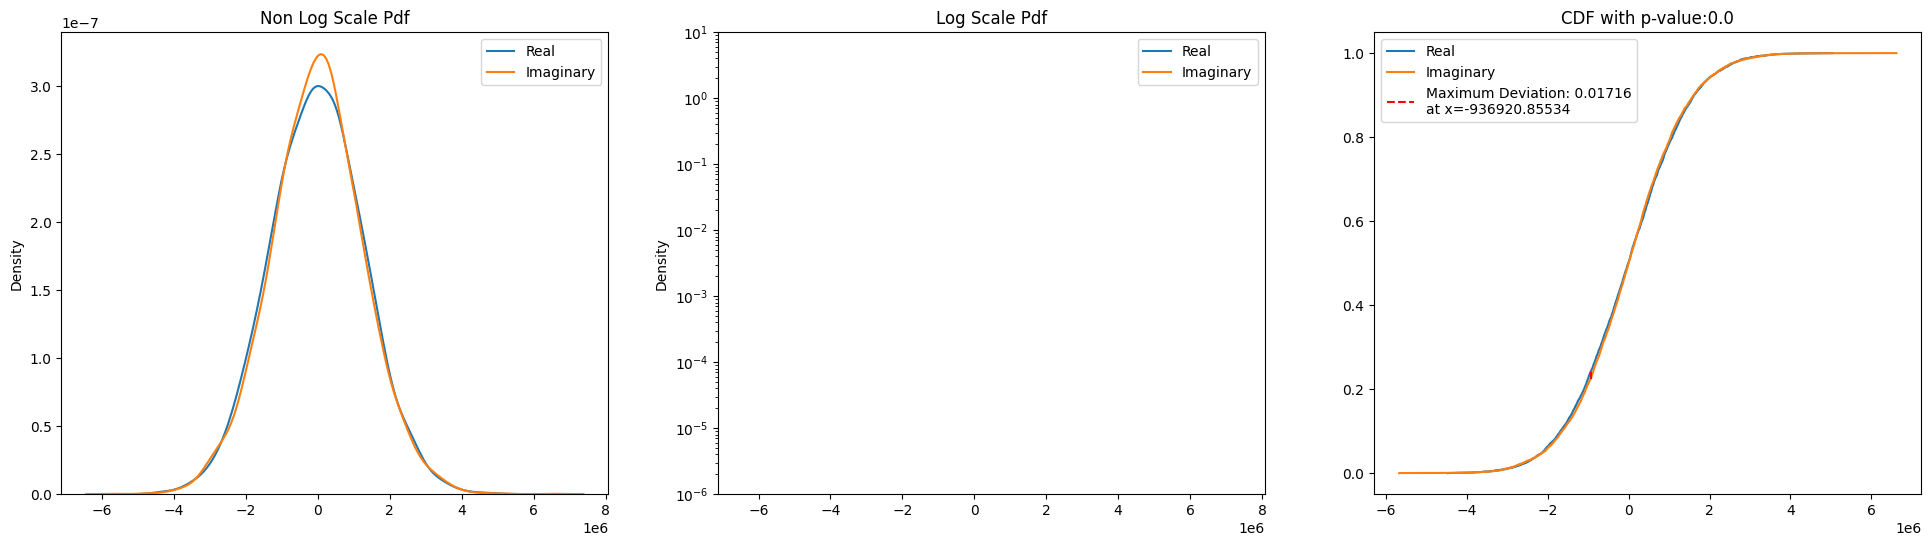

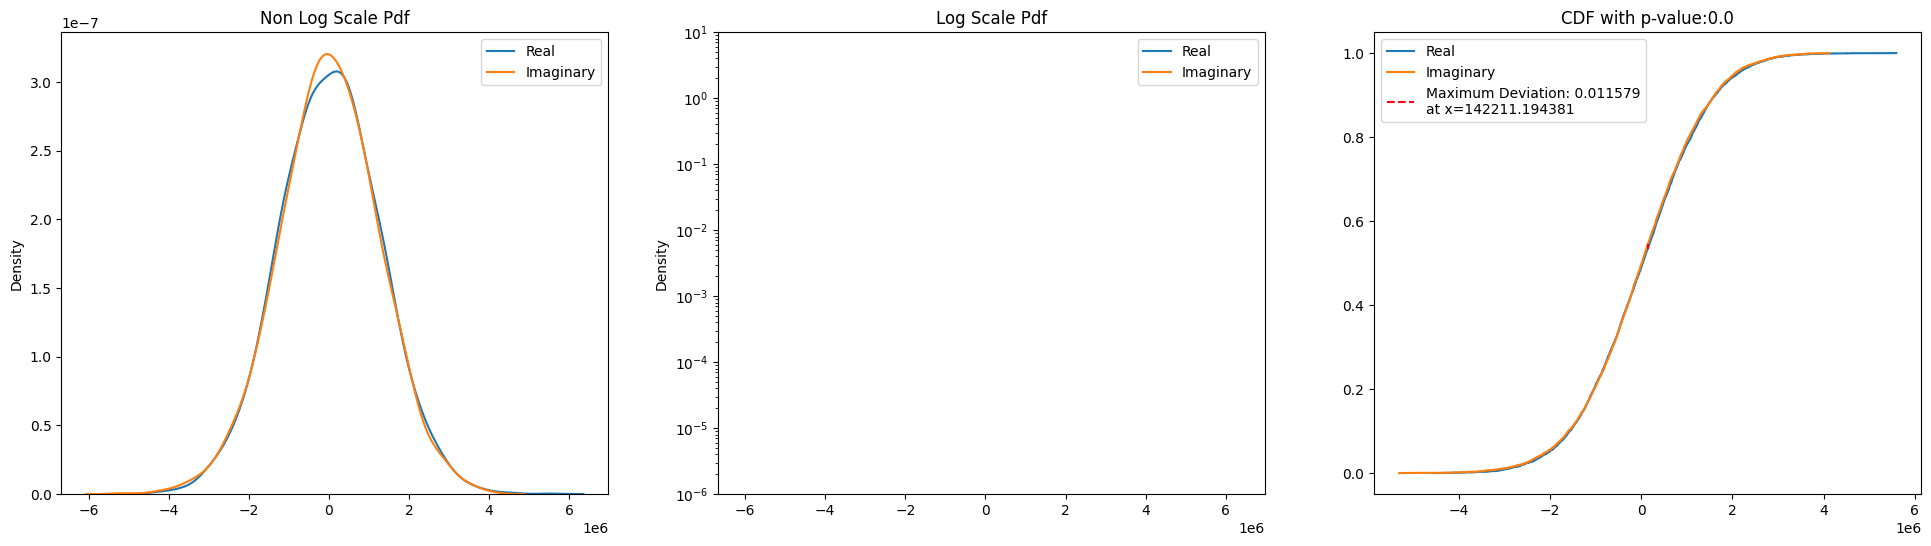

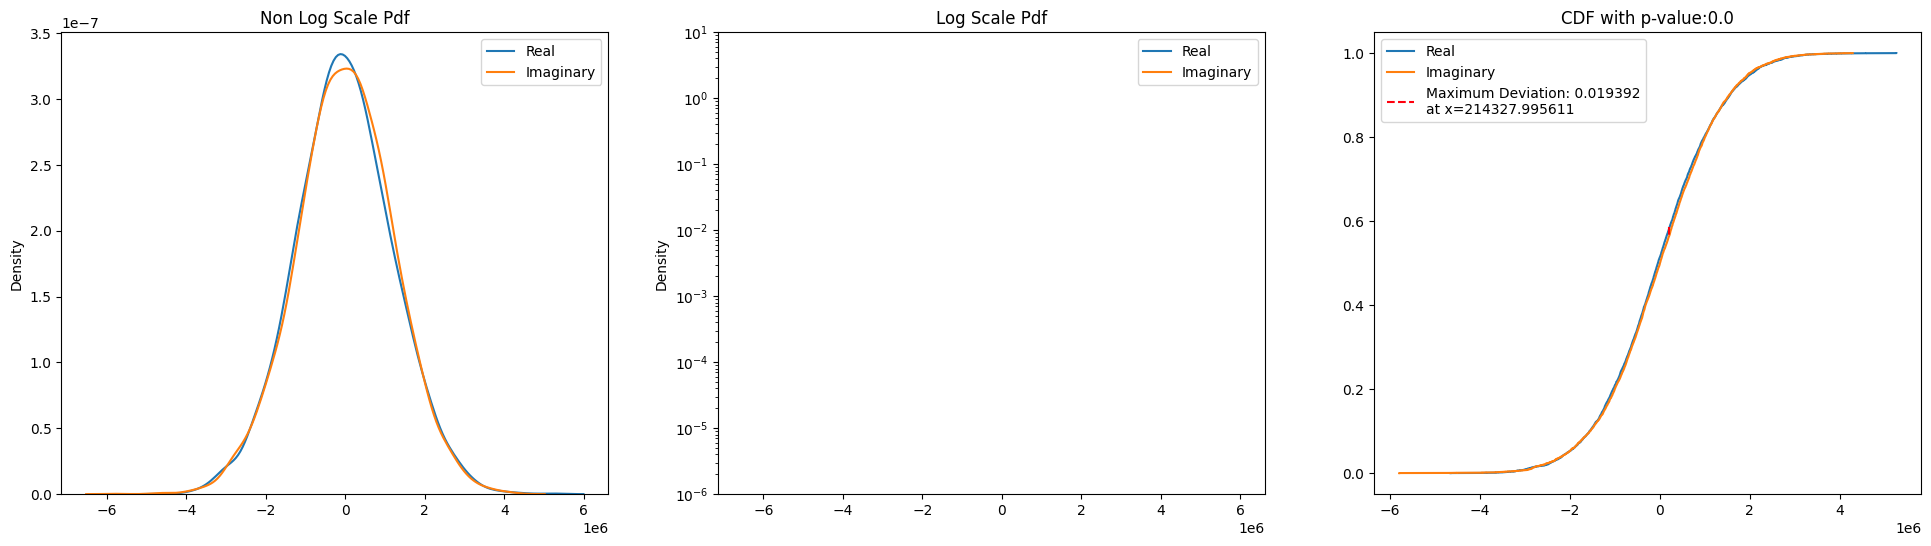

In [11]:

for i in range(10):
    twoSampleComparisonPlots(real_data[n//100 * (i+50): n//100 * (i+51)], imag_data[n//100 * (i+50): n//100 * (i+51)], samp1name="Real", samp2name="Imaginary")


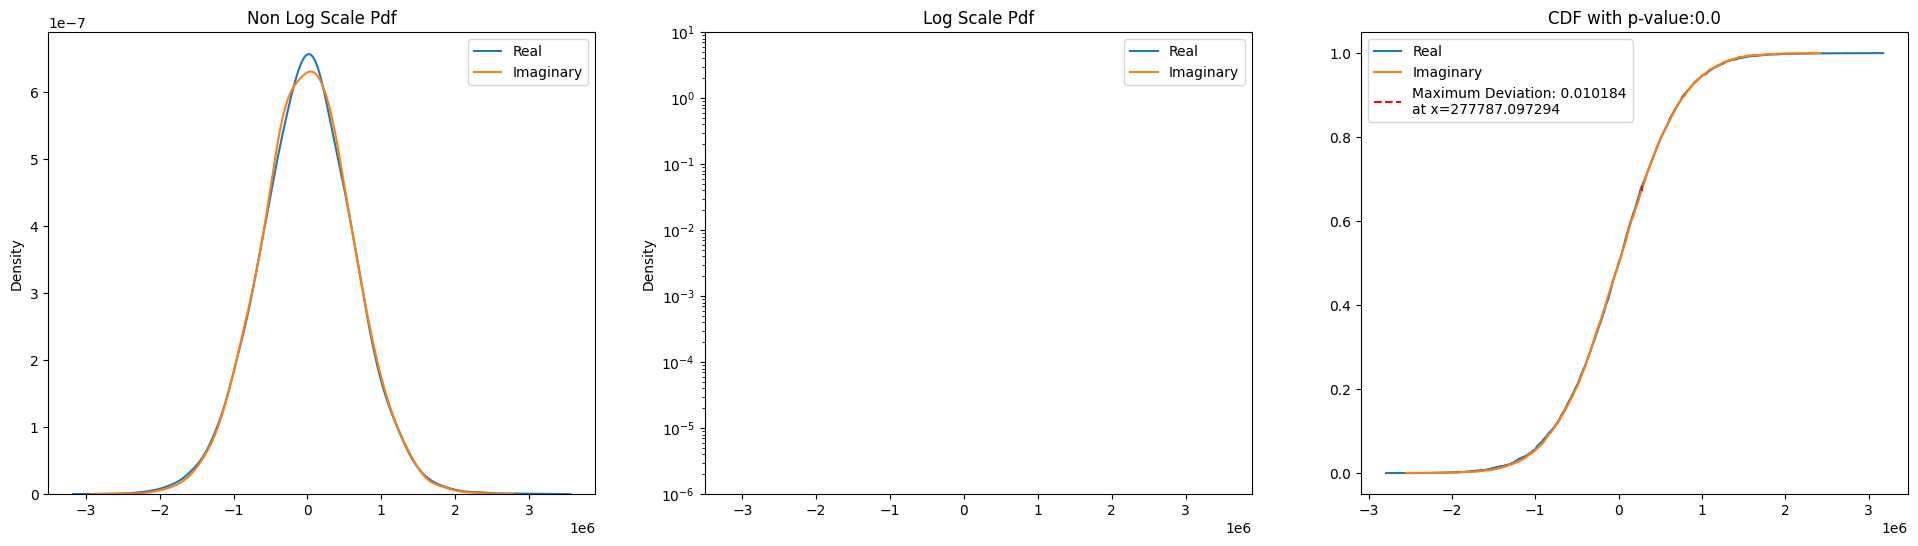

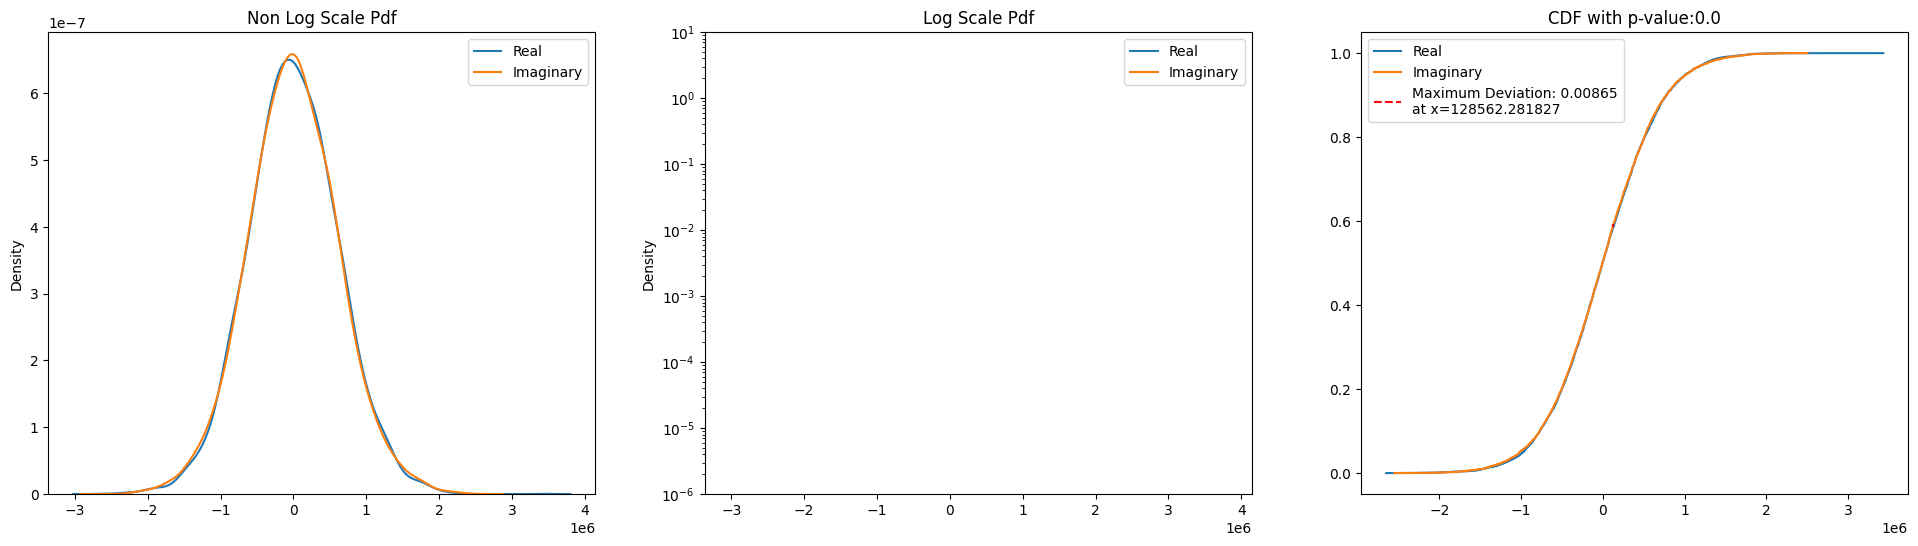

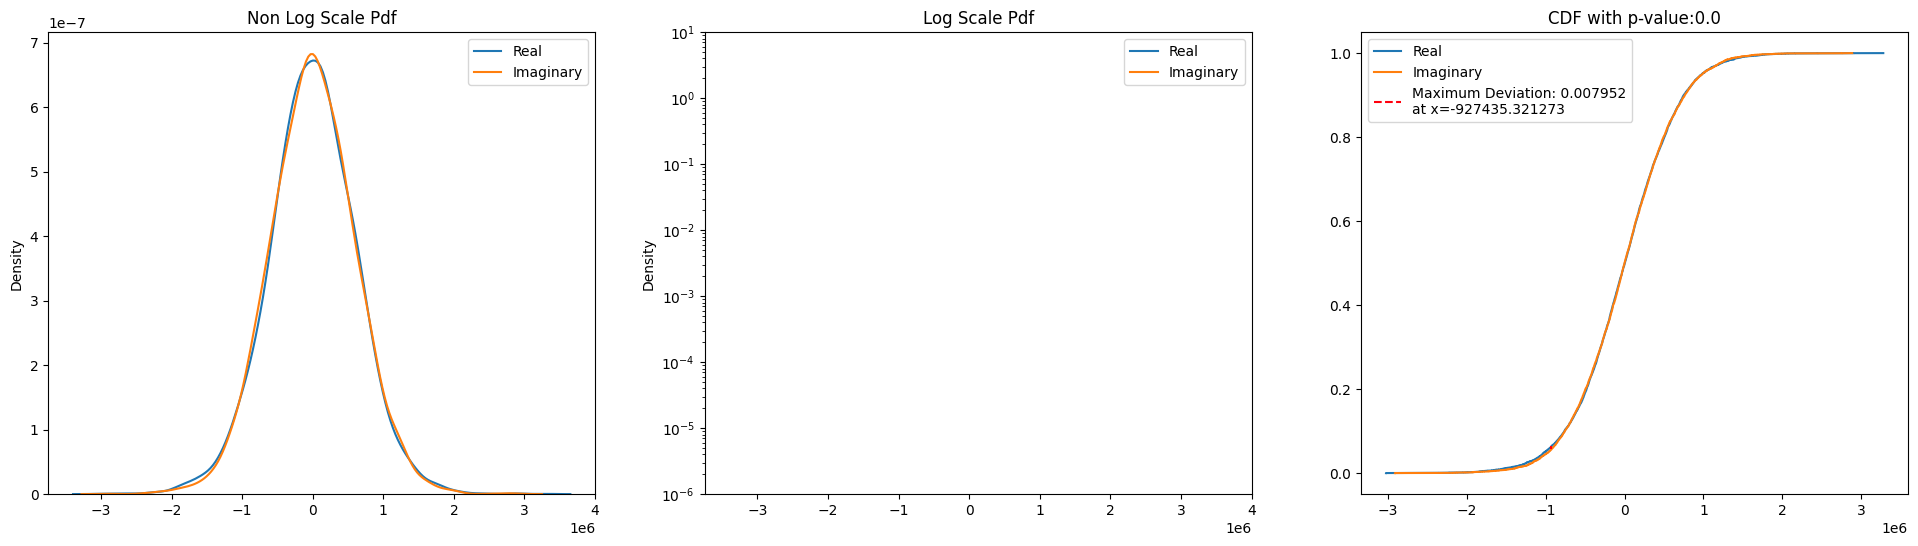

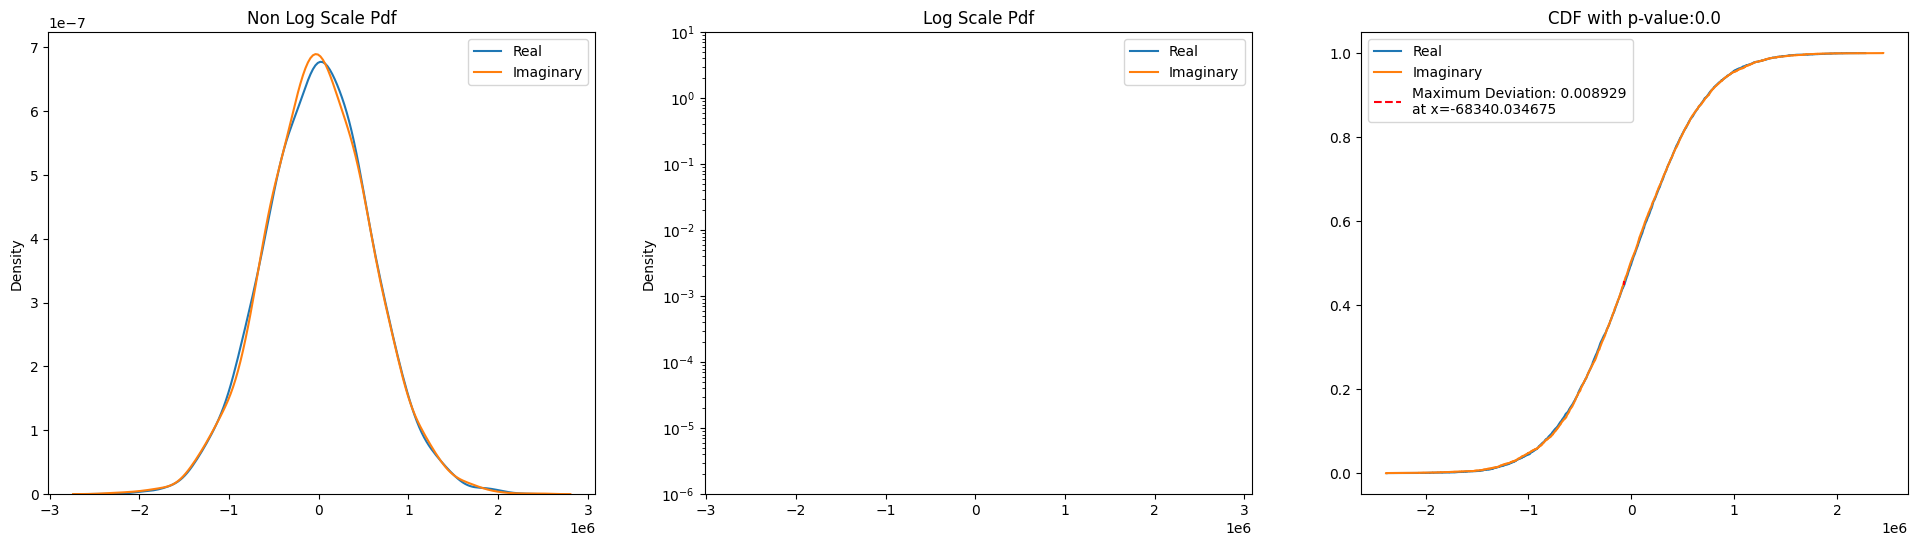

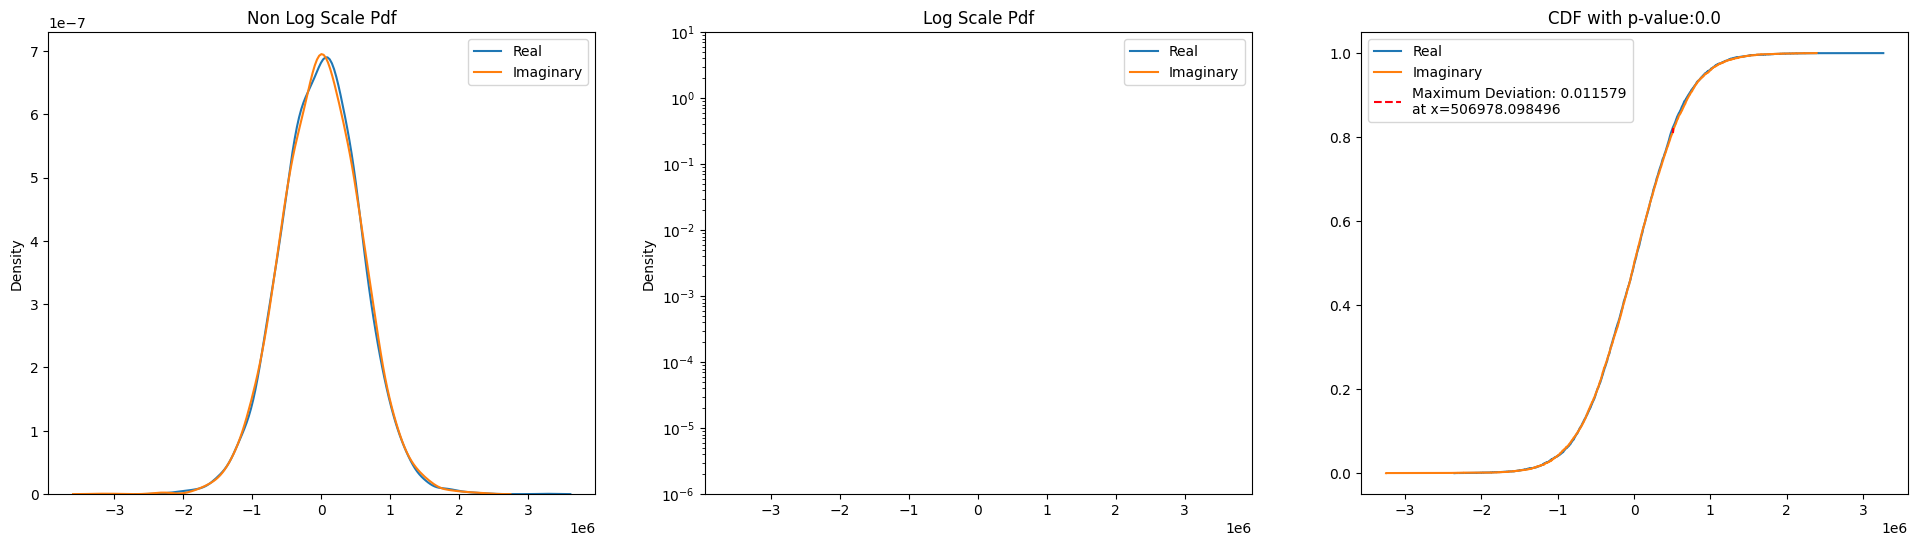

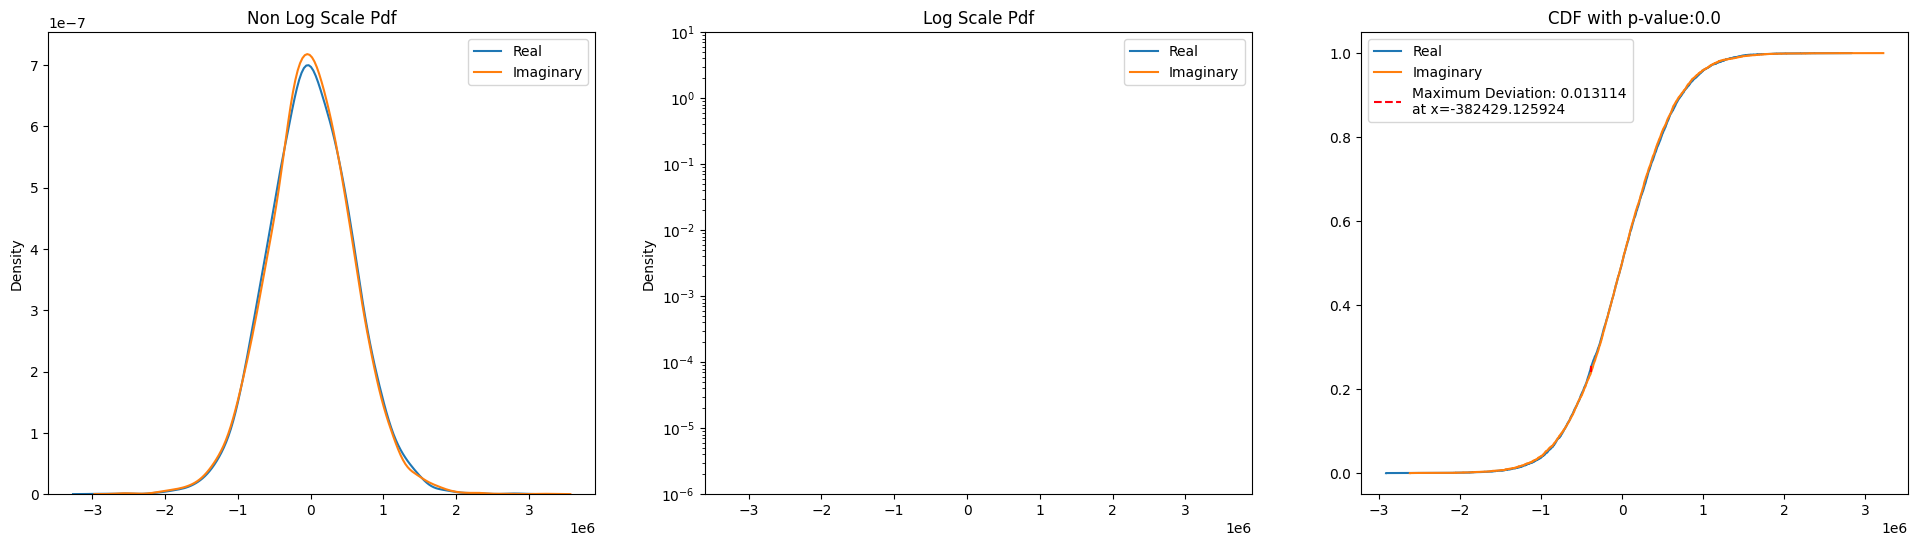

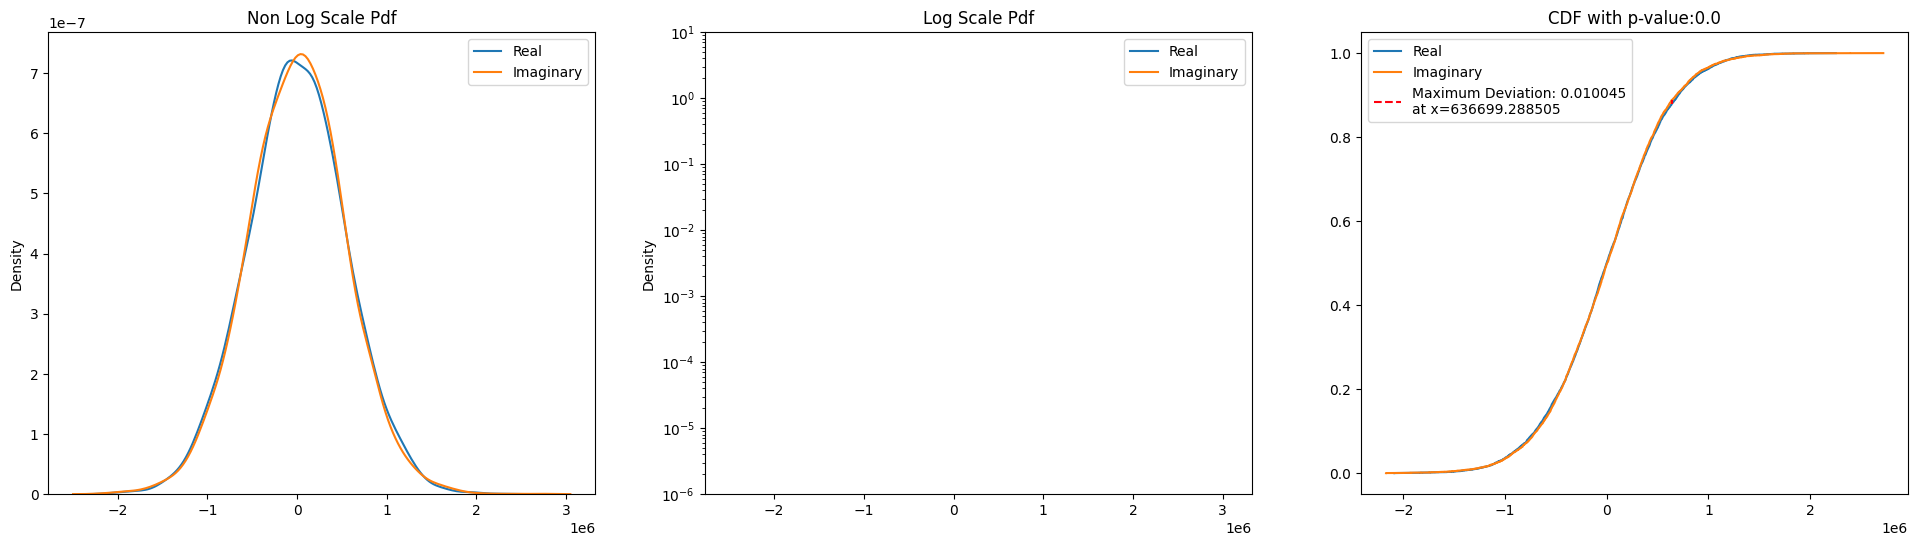

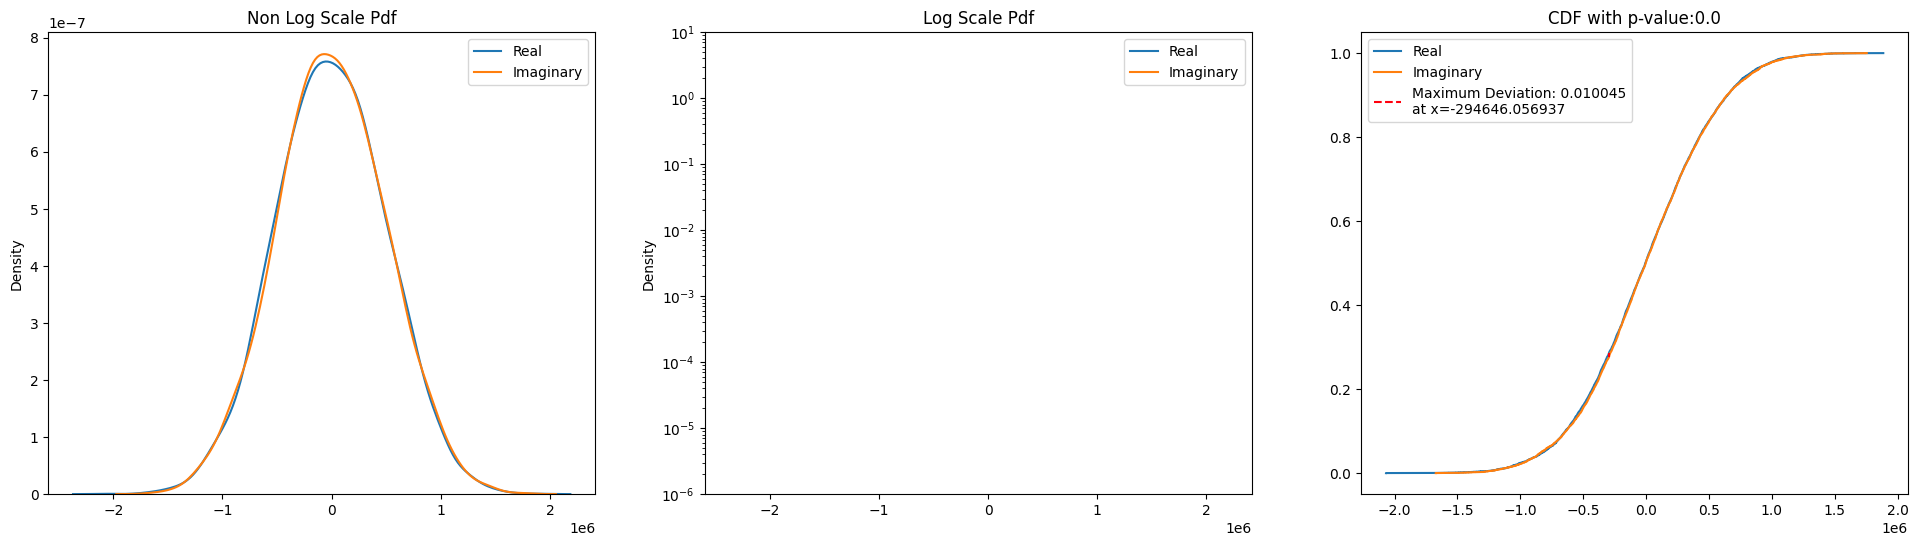

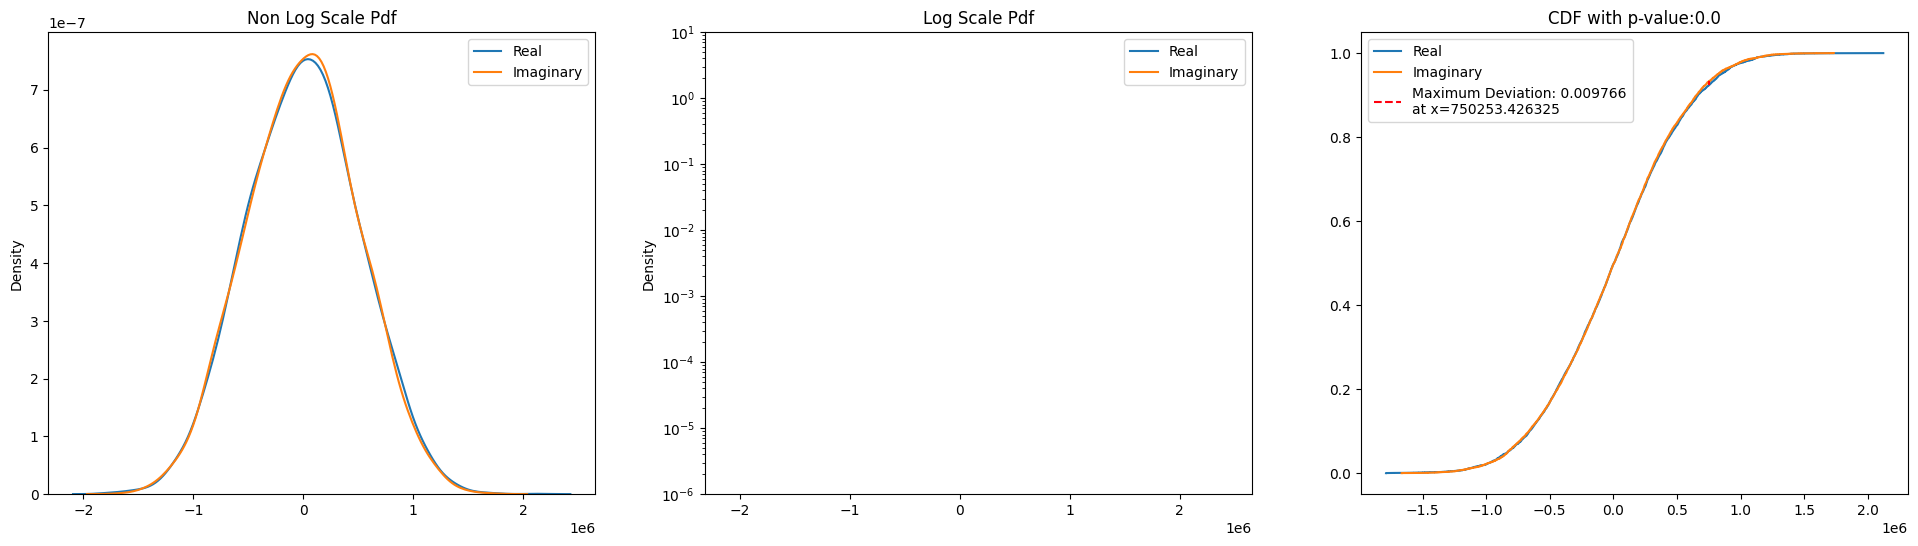

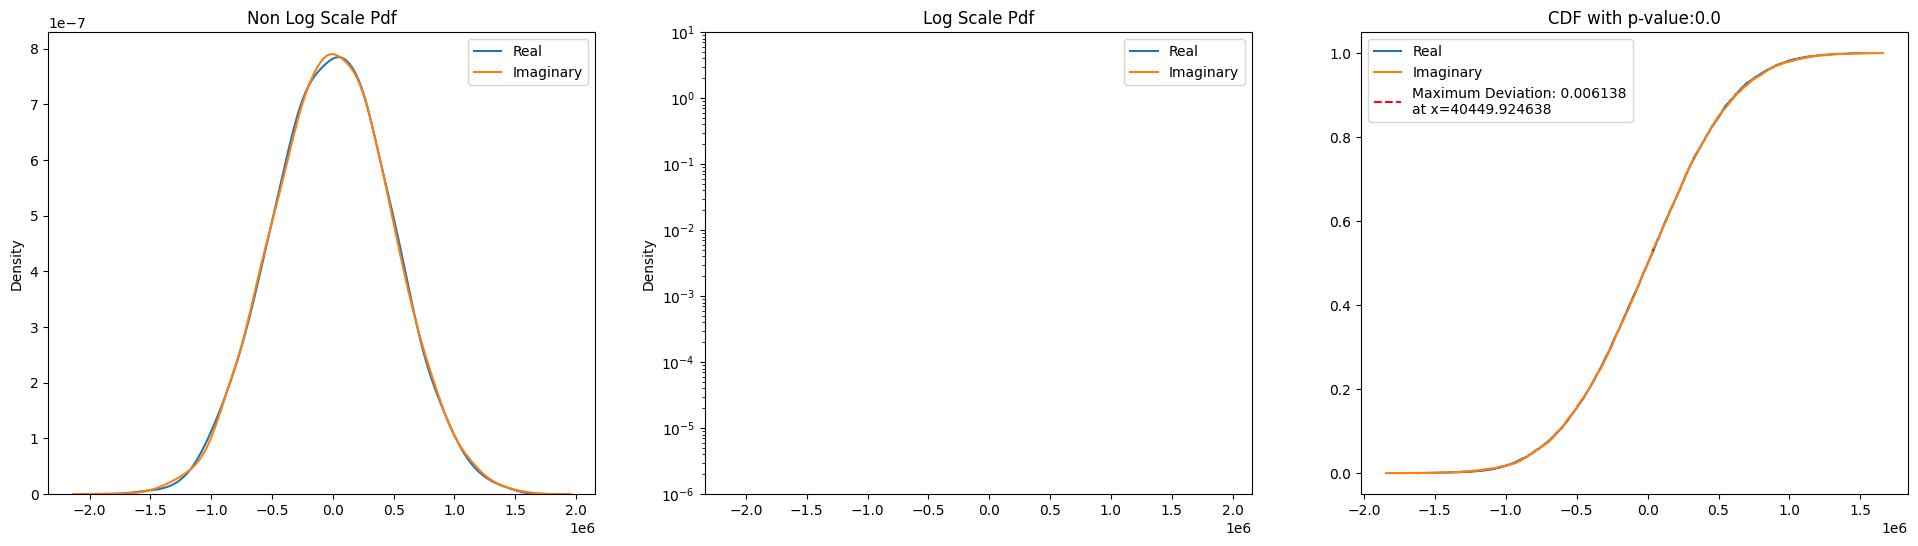

In [12]:

for i in range(10):
    twoSampleComparisonPlots(real_data[n//100 * (i+90): n//100 * (i+91)], imag_data[n//100 * (i+90): n//100 * (i+91)], samp1name="Real", samp2name="Imaginary")


In [13]:
n = len(file_list)
converted = convert_to_fourier_basis_3d(data_dir, threshold =0.03, max_depth = 9, coord_df=mri_coord_df, debug = True)
converted["number_of_coefficents"] = converted["data"].apply(lambda x:len(x))/(2 *n)
converted

100%|██████████| 100/100 [00:32<00:00,  3.10it/s]


Both Endpoints Are The Same 0.0 and 0.0 Recursion Depth of 8
Both Endpoints Are The Same 0.004464285714285714 and 0.004464285714285714 Recursion Depth of 9
Both Endpoints Are The Same 0.00625 and 0.00625 Recursion Depth of 9
Both Endpoints Are The Same 0.007680647559859488 and 0.007680647559859488 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.008838834764831846 and 0.00990226473786555
Both Endpoints Are The Same 0.010898710371190806 and 0.010898710371190806 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.0125 and 0.013273275667248667
Recursion Depth Exceeded Endpoints are 0.013392857142857142 and 0.01477941549754183
Recursion Depth Exceeded Endpoints are 0.015361295119718977 and 0.01658408537589885
Recursion Depth Exceeded Endpoints are 0.01767766952966369 and 0.018750000000000003
Recursion Depth Exceeded Endpoints are 0.018919303661086687 and 0.019924922861090533
Recursion Depth Exceeded Endpoints are 0.02026215306769682 and 0.021687424645519857
Recursion

100%|██████████| 107/107 [00:10<00:00, 10.66it/s]


,band,magnitude_endpoints,unique_magnitudes,data,number_of_coefficents
0,1,"(0.0, 0.0)",1,"[49257324416.0, 49257324416.0, 49257324416.0, ...",1.0
1,2,"(0.004464285714285714, 0.004464285714285714)",1,"[-18493530034.481766, -18493530034.481766, -18...",1.0
2,3,"(0.00625, 0.00625)",1,"[-10388715531.239899, -10388715531.239899, -10...",2.0
3,4,"(0.007680647559859488, 0.007680647559859488)",1,"[1550923540.2460556, 1550923540.2460556, 15509...",2.0
4,5,"(0.008838834764831846, 0.00990226473786555)",3,"[2942216006.35621, 2942216006.35621, 294221600...",3.0
...,...,...,...,...,...
102,103,"(0.5351462762551897, 0.5619023185227344)",13520,"[-1400681.7418588367, -1400681.7418588367, -14...",52586.0
103,104,"(0.5619051559976422, 0.5886590282418271)",12962,"[797053.292826327, 797053.292826327, 797053.29...",47640.0
104,105,"(0.588660382494327, 0.6421728749141544)",23457,"[324859.0911456275, 324859.0911456275, 324859....",77601.0
105,106,"(0.6421753577108206, 0.695682980008473)",17806,"[-187387.64845663612, -187387.64845663612, -18...",49514.0


In [14]:
converted.head(80)

,band,magnitude_endpoints,unique_magnitudes,data,number_of_coefficents
0,1,"(0.0, 0.0)",1,"[49257324416.0, 49257324416.0, 49257324416.0, ...",1.0
1,2,"(0.004464285714285714, 0.004464285714285714)",1,"[-18493530034.481766, -18493530034.481766, -18...",1.0
2,3,"(0.00625, 0.00625)",1,"[-10388715531.239899, -10388715531.239899, -10...",2.0
3,4,"(0.007680647559859488, 0.007680647559859488)",1,"[1550923540.2460556, 1550923540.2460556, 15509...",2.0
4,5,"(0.008838834764831846, 0.00990226473786555)",3,"[2942216006.35621, 2942216006.35621, 294221600...",3.0
...,...,...,...,...,...
75,76,"(0.1421719056821921, 0.14381930450026095)",134,"[89997356.49151196, 89997356.49151196, 8999735...",321.0
76,77,"(0.14384978790249167, 0.14550558408528522)",135,"[-44631891.0466904, -44631891.0466904, -446318...",353.0
77,78,"(0.14551654124363386, 0.1471698354255507)",124,"[-34052256.295120455, -34052256.295120455, -34...",346.0
78,79,"(0.14717525215517308, 0.16054058073030786)",1160,"[-27141263.44444302, -27141263.44444302, -2714...",3007.0


In [15]:
filtered_003 = converted[converted["magnitude_endpoints"].apply(lambda x: x[0] > 0.14717525)]
filtered_003

,band,magnitude_endpoints,unique_magnitudes,data,number_of_coefficents
78,79,"(0.14717525215517308, 0.16054058073030786)",1160,"[-27141263.44444302, -27141263.44444302, -2714...",3007.0
79,80,"(0.16055795968548972, 0.17391702073701937)",1324,"[45929999.15913743, 45929999.15913743, 4592999...",3534.0
80,81,"(0.17393306315701934, 0.1872936790013949)",1633,"[-4853078.812964298, -4853078.812964298, -4853...",4108.0
81,82,"(0.18730857575407597, 0.2006764707641814)",1832,"[-17468941.029236346, -17468941.029236346, -17...",4752.0
82,83,"(0.20068441567266143, 0.21405679736929636)",2090,"[-3312094.0771839637, -3312094.0771839637, -33...",5420.0
83,84,"(0.21405865946949576, 0.2274210728753057)",2294,"[-20687557.87463192, -20687557.87463192, -2068...",6088.0
84,85,"(0.22743334132201892, 0.24080342245347372)",2518,"[7699281.208523789, 7699281.208523789, 7699281...",6858.0
85,86,"(0.24081500913034673, 0.25419001509797784)",2639,"[2329401.3231930006, 2329401.3231930006, 23294...",7631.0
86,87,"(0.25419628744539213, 0.26756680693514545)",2747,"[16647574.894502956, 16647574.894502956, 16647...",8472.0
87,88,"(0.26757574504565, 0.2809451295472597)",2983,"[3049807.7425010013, 3049807.7425010013, 30498...",9330.0


 
0.05006 x - 5.714


/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_56251/2488527438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_003["magnitude_length"] = filtered_003["magnitude_endpoints"].apply(lambda x: x[1] - x[0])


1.0513373413721552

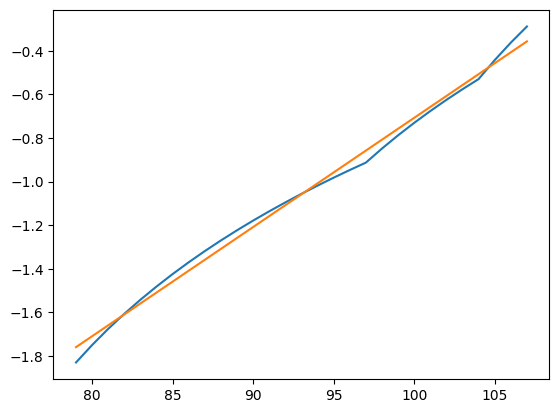

In [16]:
filtered_003["magnitude_length"] = filtered_003["magnitude_endpoints"].apply(lambda x: x[1] - x[0])
x = np.asfarray(filtered_003["band"].to_numpy())
y = np.asfarray(filtered_003["magnitude_endpoints"].apply(lambda x: x[1]).to_numpy())
logy = np.log(y)
plt.plot(x, logy)
print(np.poly1d(np.polyfit(x, logy, 1)))
plt.plot(x, np.poly1d(np.polyfit(x, logy, 1))(x))
np.exp(np.polyfit(x, logy, 1)[0])

In [17]:
def convert_fourier_unique_3d(folder_dir, coord_df = None):
    file_list = [os.path.join(folder_dir, filename) for filename in os.listdir(folder_dir) if filename != ".DS_Store"]
    image = nib.load(file_list[0]).get_fdata()
    if coord_df is None:
        coord_df = getIndexDF_3d(image, no_zero =False).sort_values(["magnitude"])
    else:
        coord_df = coord_df.copy()
    x = coord_df["x_index"].to_numpy()
    y = coord_df["y_index"].to_numpy()
    z = coord_df["z_index"].to_numpy()
    magnitudes = coord_df["magnitude"]
    freq_arr = [0]*len(file_list)
    mag_arr = [0]*len(file_list)
    for k in range(len(file_list)):
        image = nib.load(file_list[0]).get_fdata()
        transformed = np.array(fft.fftn(image))
        freq_arr[k] = transformed[tuple(x), tuple(y), tuple(z)]
        mag_arr[k] = magnitudes
    sample = np.concatenate(np.array(freq_arr).T)
    coord_df["Data"] = sample
    return coord_df

# New Dataset Stuff

In [18]:
def getSplits(minfreq, maxfreq, mult):
    arr = []
    next_freq = minfreq
    while next_freq < maxfreq:
        arr.append(next_freq)
        next_freq *= mult
    return arr
splits = getSplits(0.008052940675034493,0.5282291467669505, 1.35)
splits
    


[0.008052940675034493,
 0.010871469911296566,
 0.014676484380250364,
 0.01981325391333799,
 0.02674789278300629,
 0.0361096552570585,
 0.04874803459702898,
 0.06580984670598912,
 0.08884329305308532,
 0.11993844562166518,
 0.161916901589248,
 0.21858781714548484,
 0.29509355314640456,
 0.3983762967476462]